In [2]:
using Distributions

In [1]:
include("MC.jl");

In [2]:
include("viz.jl");

In [86]:
gr(display_type=:inline)

Plots.GRBackend()

In [3]:
pyplot()

Plots.PyPlotBackend()

In [3]:
ENV["COLUMNS"] = 200;
const N = 30;

In [4]:
fn_berlin = "irradiation_Berlin.nc";

In [5]:
data_train, data_test = getCMF(fn_berlin);

In [6]:
data_train_cls, binStarts, binMean = getBins(data_train, N) # city-specific
data_test_cls = classify(data_test, binStarts);

In [7]:
ticks = rd.(binMean, 2)

xti = (binMean[[1:2:26; 30]], ticks[[1:2:26; 30]]);

In [9]:
ncinfo(fn_berlin_w)


##### NetCDF File #####

C:\Users\xinyuan.hou\solCast\irradiation_Berlin_W.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
altitude                                            1                         
latitude                                            1                         
time                                                558048                    
longitude                                           1                         

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
rely                            DOUBLE          longitude latitude altitude ti..
altitude                        DOUBLE          altitude                        
time                            INT             time                    

In [39]:
first(data_test, 5) 

5-element Vector{Float64}:
 0.44469196601764
 0.4351617737683957
 0.269436723419728
 0.17068227409802456
 0.1429488917122064

In [7]:
binStarts

31-element Vector{Float64}:
 0.0900346482311115
 0.19845949759237494
 0.2409067781933869
 0.26946708376590045
 0.2945530461470078
 0.32037413045072666
 0.34839012593267826
 0.37891459265564215
 0.4137052013032702
 0.44852957174822566
 0.49099578180061504
 0.5423505565005856
 0.5951202294339194
 ⋮
 0.8367313458445514
 0.8560362099398299
 0.8765232849420324
 0.902279354891852
 0.928341034591938
 0.9424088958914856
 0.9486330461551061
 0.9521029371562085
 0.9552602518874201
 0.9605250556635135
 0.974820620977865
 1.0

In [8]:
fn_berlin_w  = "irradiation_Berlin_W.nc"

"irradiation_Berlin_W.nc"

In [9]:
test_neib_w = getCMF(fn_berlin_w; raw=1)[2];

#### !! dont touch above

In [14]:
h_train = histogram(data_train, bins=binStarts, xticks=ticks, ylabel="Counts",
    title="Berlin train (2004_02-2018_12)")

h_test = histogram(data_test, bins=binStarts, xticks=ticks, #ylabel="",
    title="test (2019)");

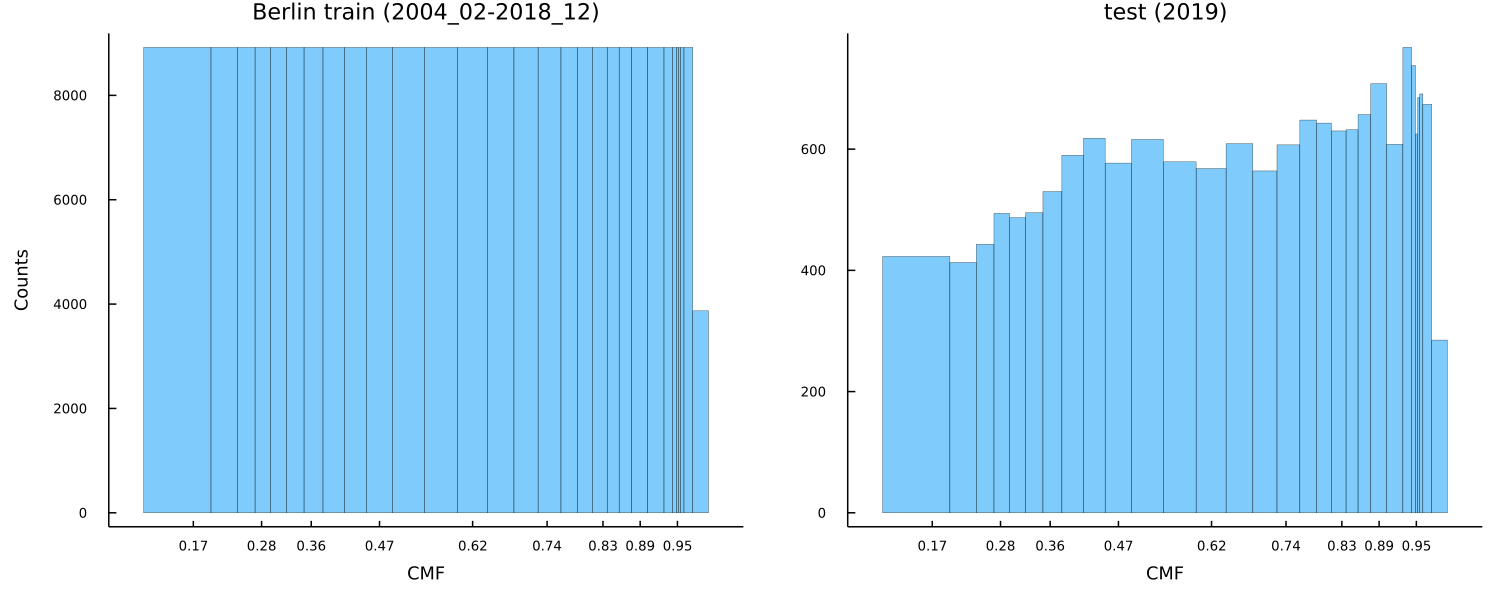

In [15]:
l = @layout [a b]
h_ep = plot(h_train, h_test, layout=l, leg=false, grid=false, xlabel="CMF", 
    lw=0.2, fillalpha=0.5, labelfontsize=8, titlefontsize=10, tickfontsize=6, 
    leftmargin=20px, bottommargin=20px, dpi=150, fmt=:png, size=(1000,400))

In [19]:
df11 = getDF(1, 1, N)

df12 = getDF(1, 2, N)
df13 = getDF(1, 3, N)
df14 = getDF(1, 4, N);

#### scatter

In [11]:
df2 = getDF(2, 1, 10)
# df21.dif_cmf = [NaN; diff(df21.real)]
df2.real_cls_prev = Int64.([1; df2.real_cls[1:end-1]])

first(df2, 5)

5×11 DataFrame
 Row │ real      real_cls  pers      pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred   dif_cls_pred  real_cls_prev 
     │ Float64   Int64     Float64   Int64     Float64      Int64         Float64   Int64     Float64    Int64         Int64         
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 0.269437         1  0.435162         3   0.165725               2  0.423986         3  0.154549              2              1
   2 │ 0.170682         1  0.269437         1   0.0987544              0  0.304889         2  0.134207              1              1
   3 │ 0.142949         1  0.170682         1   0.0277334              0  0.255325         1  0.112377              0              1
   4 │ 0.151292         1  0.142949         1  -0.00834314             0  0.255325         1  0.104033              0              1
   5 │ 0.240145         1  0.151292         1  -0.0888532              0  0.255325         1  0.0151802             0              1

1 9:15 predicted from 9:00
2 9:30 predicted from 9:15
y dif pred - real at 9:30 vs (Row 2)
x dif cmf real 9:30 - real 9:15 (Row 2 - 1)

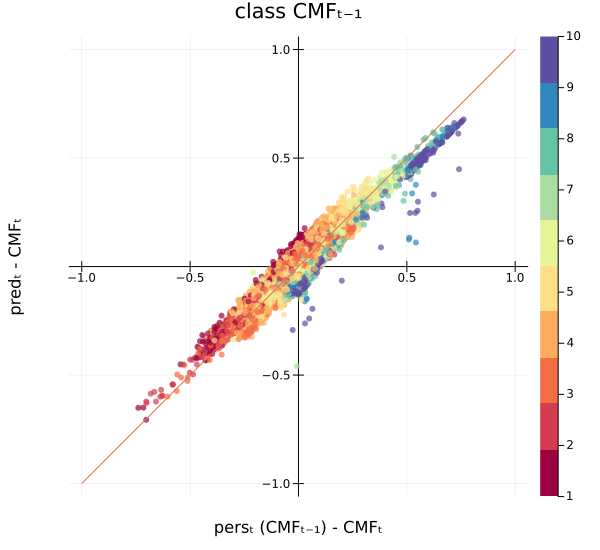

In [12]:
@df df2 scatter(:dif_pers, :dif_pred, marker_z=:real_cls_prev, frame=:origin, 
        c=palette(:Spectral_10), 
        marker=(0.7, stroke(0)), label="", fmt=:png, size=(600,550),
        xlabel="persₜ (CMFₜ₋₁) - CMFₜ", ylabel="predₜ - CMFₜ", title="class CMFₜ₋₁")
plot!(-1:1, -1:1, label="")

In [88]:
gb = groupby(df2, :real_cls)

GroupedDataFrame with 10 groups based on key: real_cls
First Group (1279 rows): real_cls = 1
  Row │ real      real_cls  pers      pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred     dif_cls_pred  real_cls_prev 
      │ Float64   Int64     Float64   Int64     Float64      Int64         Float64   Int64     Float64      Int64         Int64         
──────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ 0.269437         1  0.435162         3   0.165725               2  0.423986         3   0.154549               2              1
    2 │ 0.170682         1  0.269437         1   0.0987544              0  0.304889         2   0.134207               1              1
    3 │ 0.142949         1  0.170682         1   0.0277334              0  0.255325         1   0.112377               0              1
    4 │ 0.151292         1  0.142949         1  -0.00834314             0  0.255325         1   0.104033               0              1
    5 │ 0.240145         1  0.151292         1  -0.0888532              0  0.255325         1   0.0151802              0              1
    6 │ 0.227377         1  0.240145         1   0.0127687              0  0.255325         1   0.0279489              0              1
    7 │ 0.182802         1  0.227377         1   0.0445747              0  0.255325         1   0.0725236              0              1
    8 │ 0.18157          1  0.182802         1   0.00123228             0  0.255325         1   0.0737559              0              1
    9 │ 0.180078         1  0.18157          1   0.00149155             0  0.255325         1   0.0752474              0              1
   10 │ 0.178091         1  0.180078         1   0.00198684             0  0.255325         1   0.0772343              0              1
   11 │ 0.18459          1  0.178091         1  -0.00649838             0  0.255325         1   0.0707359              0              1
  ⋮   │    ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮           ⋮            ⋮              ⋮
 1269 │ 0.25633          1  0.190261         1  -0.0660697              0  0.255325         1  -0.00100483             0              1
 1270 │ 0.176517         1  0.3559           3   0.179383               2  0.402693         3   0.226177               2              3
 1271 │ 0.179369         1  0.422837         3   0.243468               2  0.361469         3   0.1821                 2              3
 1272 │ 0.191017         1  0.179369         1  -0.0116474              0  0.304889         2   0.113872               1              1
 1273 │ 0.197843         1  0.191017         1  -0.00682613             0  0.255325         1   0.0574827              0              1
 1274 │ 0.188337         1  0.424252         3   0.235915               2  0.361469         3   0.173132               2              3
 1275 │ 0.201647         1  0.302318         2   0.100671               1  0.371948         3   0.170302               2              2
 1276 │ 0.184874         1  0.201647         1   0.0167722              0  0.274445         2   0.0895708              1              1
 1277 │ 0.18662          1  0.423038         3   0.236418               2  0.361469         3   0.174849               2              3
 1278 │ 0.266667         1  0.307581         2   0.0409142              1  0.371948         3   0.105281               2              2
 1279 │ 0.253142         1  0.36159          3   0.108449               2  0.42237          3   0.169228               2              3
                                                                                                                       1257 rows omitted
⋮
Last Group (2024 rows): real_cls = 10
  Row │ real      real_cls  pers      pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred    dif_cls_pred  real_cls_prev 
      │ Float64   Int64     Float64   Int64     Float64      

In [95]:
err_pred = [meanad(g.pred, g.real) for g in gb]
err_pers = [meanad(g.pers, g.real) for g in gb]

In [126]:
err_pred .< err_pers

10-element BitVector:
 0
 0
 1
 1
 1
 1
 0
 0
 0
 0

In [111]:
errs = vcat(err_pred, err_pers)

20-element Vector{Float64}:
 0.08811518982537545
 0.07832233896011273
 0.11979673935208222
 0.09928658886410813
 0.10899578112302225
 0.06765894025158821
 0.05541326537891929
 0.055954897461716106
 0.027623323262932195
 0.066326727879665
 0.060053271966327516
 0.06812574921155204
 0.12005925333302456
 0.1030487561588208
 0.11513686808771226
 0.07252460994540501
 0.04952250712540409
 0.03674198877577793
 0.011650384349865569
 0.01715140615555718

In [99]:
tickss = rd.(binMean, 2)
xticks = repeat(string.(tickss), outer=2)

mode = repeat(["pred", "pers"], inner=10);

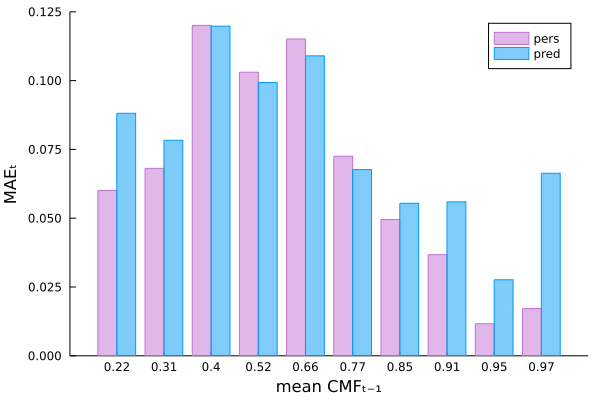

In [128]:
groupedbar(xticks, errs, group=mode, grid=false, 
    c=[4 1], lc=[4 1], fillalpha=0.5,
    ylim=(0,0.125),
    xlabel="mean CMFₜ₋₁", ylabel="MAEₜ")

In [9]:
df21 = getDF(2, 1, N);

LoadError: UndefVarError: test_neib not defined

In [38]:
df22 = getDF(2, 2, N)

In [39]:
df23 = getDF(2, 3, N)
df24 = getDF(2, 4, N);

#### Dif vs dif

In [90]:
describe(df21.dif_cmf)

Summary Stats:
Length:         17977
Missing Count:  0
Mean:           0.000027
Minimum:        -0.762490
1st Quartile:   -0.018055
Median:         0.000399
3rd Quartile:   0.033295
Maximum:        0.739025
Type:           Float64


In [13]:
function dif_viz(df, steps)
    df.dif_cmf = -df.dif_pers;
    difBinStarts = collect(-0.8:0.1:0.7)
    df.cls_dif_cmf = classify(df.dif_cmf, difBinStarts)
    df = filter(:dif_neib => d -> !isnan(d), df)
    
    gb = groupby(df, :cls_dif_cmf)
    bin_mn = [mean(g.dif_cmf) for g in gb]
    dif_pers_mn = [mean(g.dif_pers) for g in gb]
    dif_pred_a = [mean(g.dif_pred) for g in gb]
    dif_neib = [mean(g.dif_neib) for g in gb]
    
    if steps == 1
        difs = [dif_pers_mn, dif_pred_a, dif_neib]
        cl = [4 1 5]
    else
        dif_pred_b = [mean(g.dif_pred_n) for g in gb]
        difs = [dif_pers_mn, dif_pred_a, dif_pred_b]
        cl = [4 1 7]
    end
#     steps == 2 ? lab = ["pers" "pred_a" "pred_b"] : lab = false
    steps == 1 ? lab = ["pers" "pred_a" "neib_w"] : lab = false
    labDic = Dict(1 => ("realₜ₊₁", "predₜ₊₁"), 2 => ("realₜ₊₂", "predₜ₊₂"),
                  3 => ("realₜ₊₃", "predₜ₊₃"), 4 => ("realₜ₊₄", "predₜ₊₄"))
    real, pred = labDic[steps]
    p = plot(bin_mn, difs, c=cl, label=lab, leg=:bottomleft, frame=:origin, marker=(0.7, stroke(0)), 
        xlabel="ΔCMF ($(real) - realₜ)", ylabel="$(pred) - $(real)", title="+$(15*steps) min", #left_margin=2px,
        xticks=rd.(bin_mn,2), xrotation=45, yticks=-1:0.2:1, size=(600, 550), fmt=:png) 
#         tickfontsize=6, dpi=:150)
    return p
end

dif_viz (generic function with 1 method)

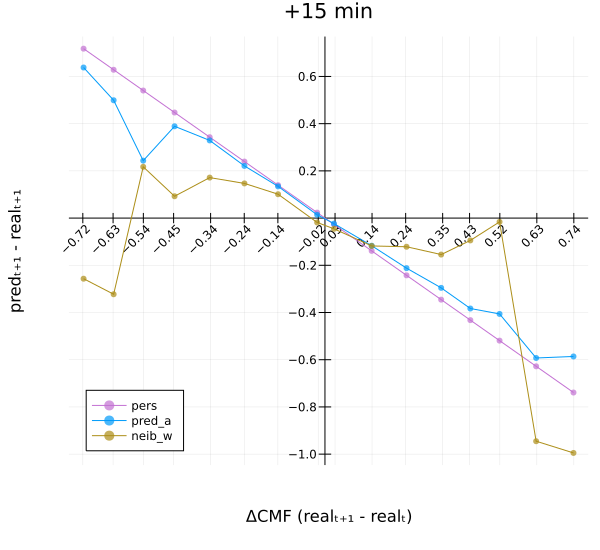

In [14]:
p21_w = dif_viz(df21, 1)

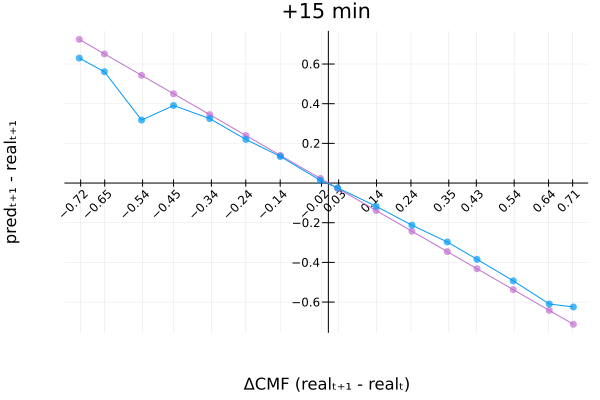

In [90]:
p21 = dif_viz(df21, 1)

In [91]:
p22 = dif_viz(df22, 2)
p23 = dif_viz(df23, 3)
p24 = dif_viz(df24, 4);

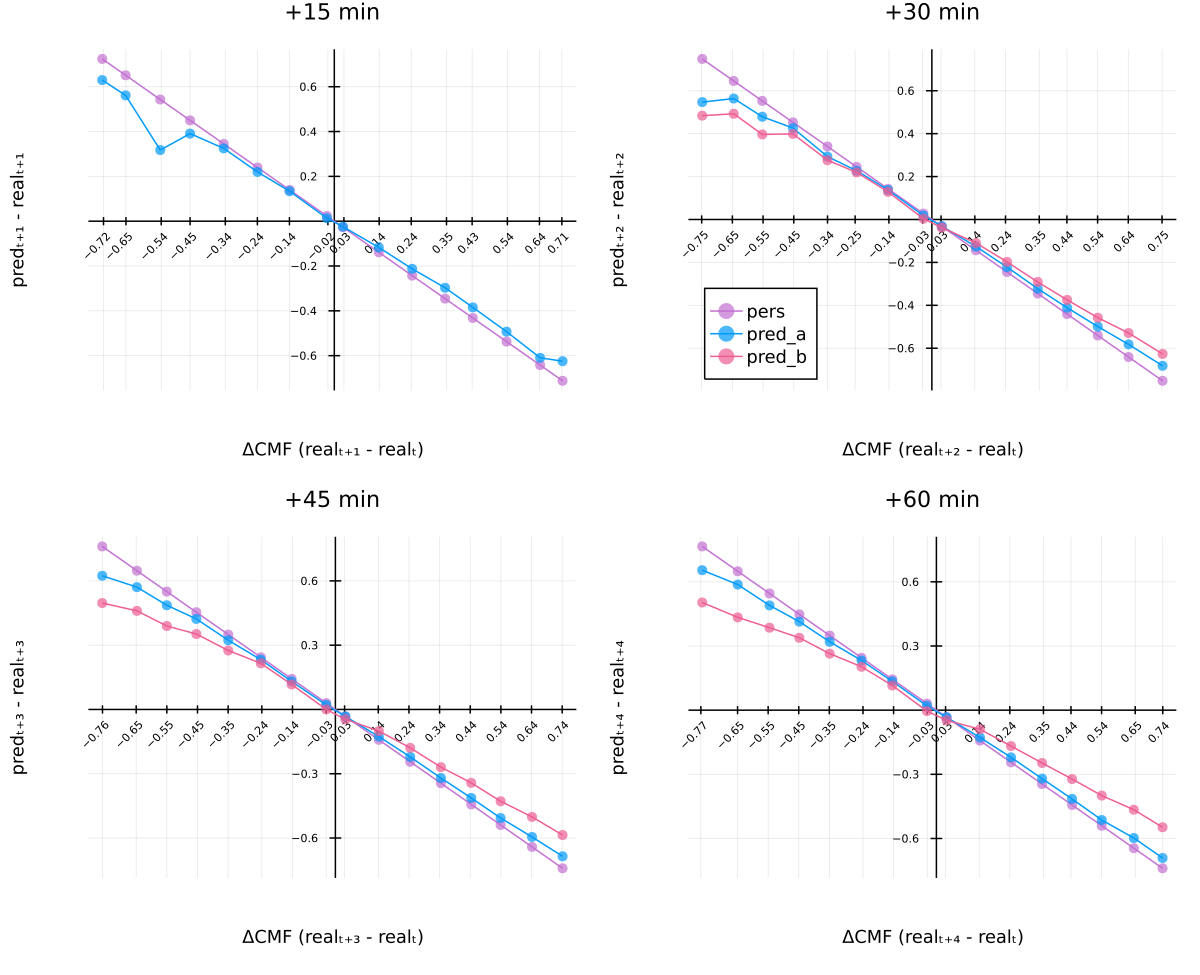

In [93]:
difs = plot(p21, p22, p23, p24, layout=@layout([a b; c d]), tickfontsize=5, labelfontsize=8, titlefontsize=10, 
    size=(800, 650), dpi=:150, fmt=:png)

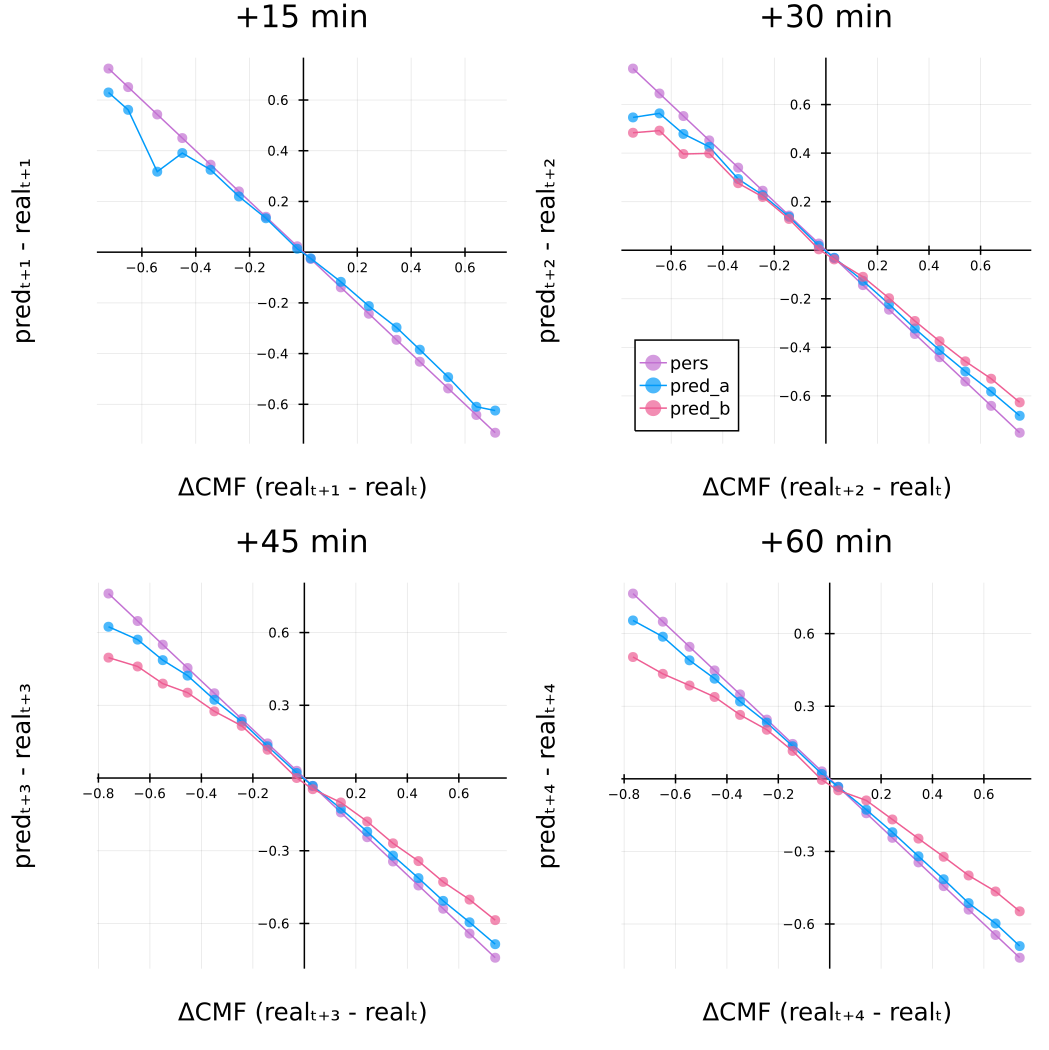

In [44]:
difs = plot(p21, p22, p23, p24, layout=@layout([a b; c d]), fmt=:png, size=(700, 700))

#### heatmaps

##### train

In [42]:
# rewrite transition matrix
state = data_train_cls
len = length(state)
T2 = zeros(N, N, N) # 2. od
for i in 2:len-1
    T2[state[i-1], state[i], state[i+1]] += 1
end
sumZ = sum(T2; dims=3)
T22 = T2./sumZ
T_train = sum([T22[:, :, i] * binMean[i] for i in 1:30]);

30×30 Matrix{Float64}:
   0.213818    0.281747    0.314274  0.338495  0.37369   0.420056  0.463879  0.494226  0.520531  …  NaN         NaN         NaN           0.430793  NaN         NaN         NaN         0.915987
   0.219746    0.246403    0.296921  0.328775  0.376172  0.40379   0.444227  0.482014  0.544883       0.888606    0.666498  NaN           0.396424    0.396424  NaN           0.947112  0.966057
   0.245249    0.250008    0.276249  0.328667  0.35264   0.384202  0.43275   0.490463  0.492647       0.642515    0.587929    0.606445    0.67339   NaN           0.447733  NaN         0.942857
   0.237517    0.260379    0.271684  0.299544  0.352263  0.375359  0.420396  0.470483  0.496743       0.693367    0.786182    0.780998  NaN           0.950541    0.509034    0.876105  0.97409
   0.254423    0.278164    0.282097  0.299934  0.324791  0.383228  0.412923  0.447832  0.488569       0.881134    0.683682    0.800293    0.790752    0.430793  NaN           0.93093   0.925542
   0.255008  

##### test

In [58]:
s_t_2 = df21.pers_cls
s_t_1 = df21.real_cls
pred = df21.pred;

T, T_ct = zeros(N, N), zeros(N, N)
len = length(pred)
for i in 1:len-1
    T[s_t_2[i], s_t_1[i]] += pred[i+1]
    T_ct[s_t_2[i], s_t_1[i]] += 1
end

T_test = T ./ T_ct;

30×30 Matrix{Float64}:
   0.213818    0.281747    0.314274    0.338495    0.37369     0.420056    0.463879    0.494226  …  NaN         NaN         NaN         NaN         NaN         NaN         NaN         NaN
   0.219746    0.246403    0.296921    0.328775    0.376172    0.40379     0.444227    0.482014     NaN         NaN         NaN         NaN           0.396424  NaN         NaN         NaN
   0.245249    0.250008    0.276249    0.328667    0.35264     0.384202    0.43275     0.490463     NaN         NaN         NaN         NaN         NaN         NaN           0.0         0.942857
   0.237517    0.260379    0.271684    0.299544    0.352263    0.375359    0.420396    0.470483     NaN         NaN         NaN           0.0       NaN           0.509034  NaN           0.97409
   0.254423    0.278164    0.282097    0.299934    0.324791    0.383228    0.412923    0.447832     NaN           0.683682    0.800293    0.790752  NaN         NaN         NaN           0.925542
   0.255008    0.

In [55]:
hm_train = heatmap(T_train, c=:jet, clim=(0,1), title="CMFₜ training") 

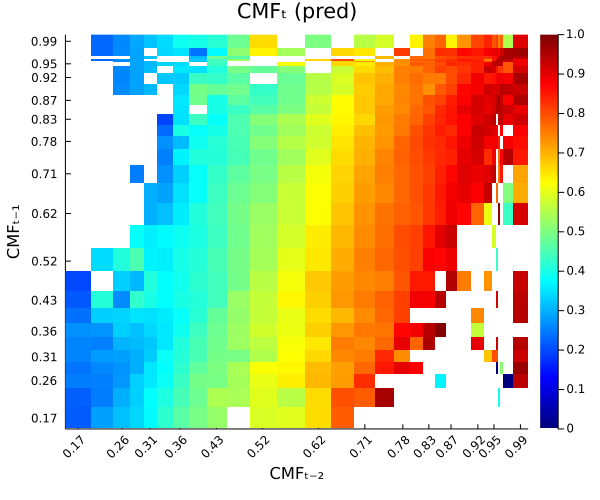

In [59]:
hm_test = heatmap(binMean, binMean, T_test, c=:jet, clim=(0,1), grid=false, title="CMFₜ (pred)", fmt=:png, dpi=100, size=(600,500),
    xticks=xti, yticks=xti, xrotation=45, 
    xlabel="CMFₜ₋₂", ylabel="CMFₜ₋₁")

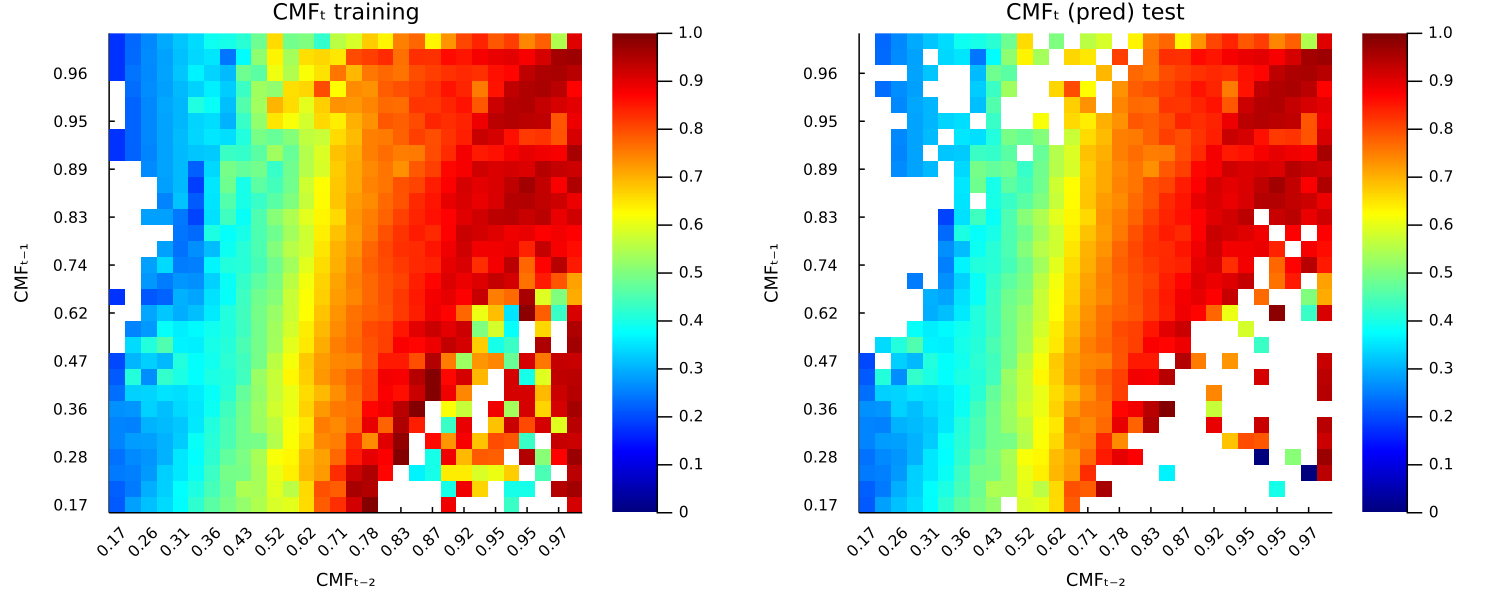

In [60]:
hms = plot(hm_train, hm_test, layout=@layout([a b]), grid=false, fmt=:png, dpi=150, size=(1000,400),
    xticks=(1:2:30, ticks[1:2:30]), yticks=(1:3:30, ticks[1:3:30]), xrotation=45, 
    xlabel="CMFₜ₋₂", ylabel="CMFₜ₋₁", titlefontsize=10, labelfontsize=8, tickfontsize=7, 
    leftmargin=20px, bottommargin=20px)

##### dif_pred

In [37]:
s_t_2 = df21.pers_cls
# s_t_1 = df21.real_cls
dif = df21.dif_pred;

T_dif, T_ct = zeros(N, N), zeros(N, N)
len = length(dif)
for i in 2:len-1
    T_dif[s_t_2[i-1], s_t_2[i]] += dif[i]
    T_ct[s_t_2[i-1], s_t_2[i]] += 1
end

T_dif_mn = T_dif ./ T_ct;

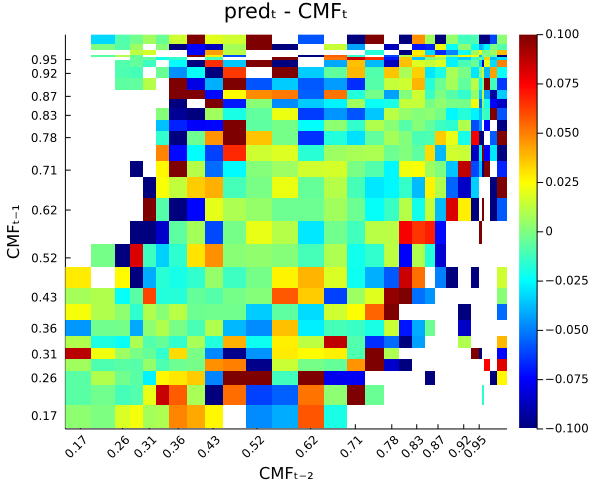

In [38]:
heatmap(ticks, ticks, T_dif_mn, c=:jet, clim=(-0.1,0.1), grid=false, fmt=:png, dpi=100, size=(600,500),
    xticks=xti, yticks=xti, xrotation=45,
    rightmargin=25px, 
    xlabel="CMFₜ₋₂", ylabel="CMFₜ₋₁", title="predₜ - CMFₜ") 

#### pACF

In [8]:
lags = collect(0:10)
pACF_train = pacf(data_train, lags)

11-element Vector{Float64}:
  1.0
  0.8950278187353926
 -0.1297686872609787
  0.1480611713779651
  0.018718040107171124
  0.056977667039441175
  0.03379964557040376
  0.03609850297600837
  0.024416348982315227
  0.023665355381098152
  0.02077301939930371

In [9]:
pACF_test = pacf(data_test, lags)

11-element Vector{Float64}:
  1.0
  0.8933969888378854
 -0.1019465568298232
  0.143702737015086
  0.006365301214471336
  0.06269634124419815
  0.035294049940034045
  0.04248351833356964
  0.02108308288209466
  0.014819590597472499
  0.024580267692225256

In [11]:
σ = 1.96 / √length(data_test)

0.014617506820435396

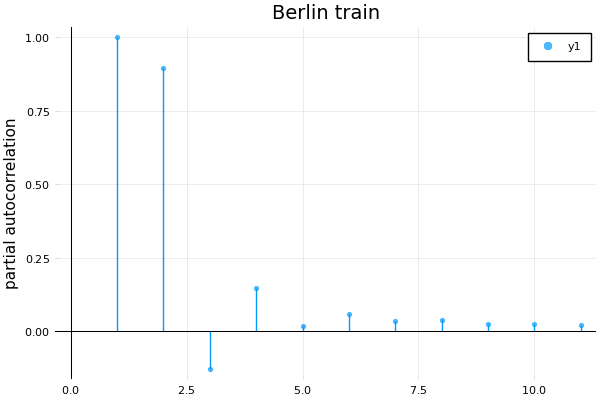

In [21]:
acfTr = plot(pACF_train, st=:stem, marker=(0.7, :o, stroke(0)), frame=:zerolines, title="Berlin train", ylabel="partial autocorrelation")

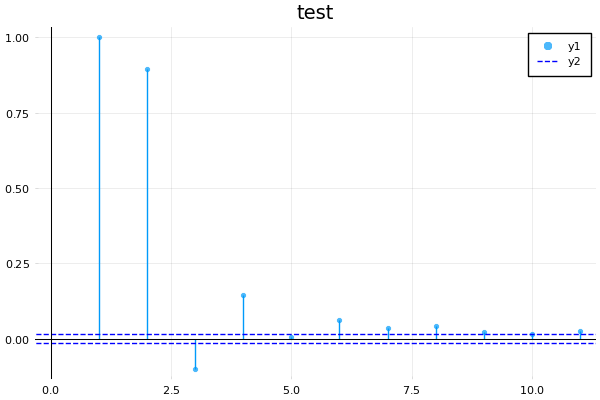

In [19]:
acfTe = plot(pACF_test, st=:stem, marker=(0.7, :o, stroke(0)), frame=:zerolines, title="test")
hline!([-σ, σ], ls=:dash, lc=:blue)

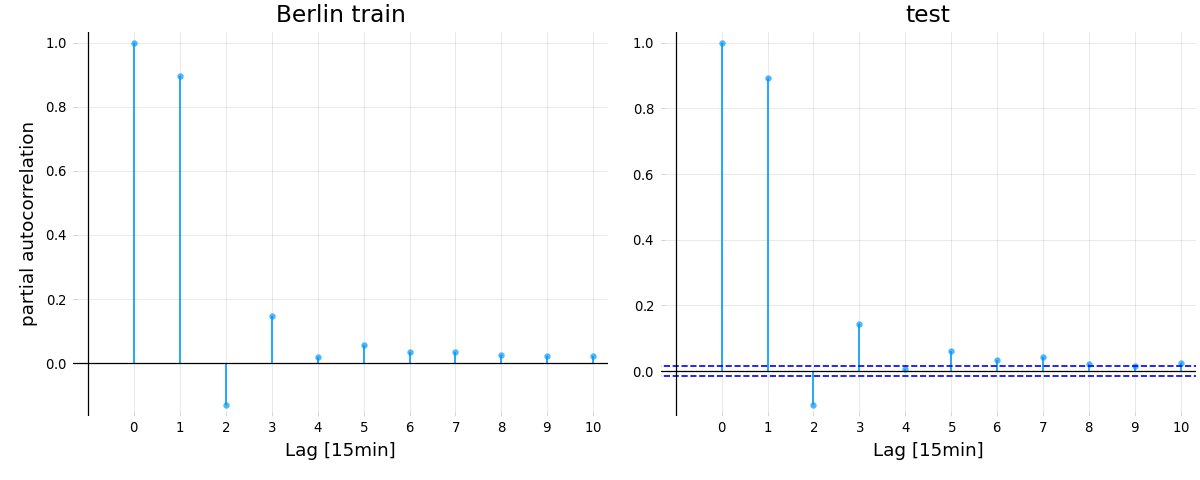

In [22]:
acfs = plot(acfTr, acfTe, layout=@layout([a b]), leg=false, frame=:zerolines, 
    xticks=(1:11, lags), yticks=-0.2:0.2:1.0, xlabel="Lag [15min]", 
    leftmargin=20px, bottommargin=20px, dpi=120, size=(1000,400))

#### log likelihood

In [83]:
function llh(nc) # num_cls
    data_train_cls, binStarts, binMean = getBins(data_train, nc) 
    return loglikelihood(Normal(), data_train_cls)
end

llh (generic function with 1 method)

In [89]:
nc = 2:2:30
llhs = Float64[]
for n in nc
    push!(llhs, llh(n))
end
llhs

15-element Vector{Float64}:
 -580423.8840553071
      -1.24944238405531e6
      -2.275277884055311e6
      -3.657908384055311e6
      -5.397357884055309e6
      -7.493629384055279e6
      -9.946683884055227e6
      -1.2756564384055194e7
      -1.5923327884055194e7
      -1.9446750384055227e7
      -2.3327043884055242e7
      -2.7564205384055242e7
      -3.21581138840552e7
      -3.710885038405514e7
      -4.241642988405506e7

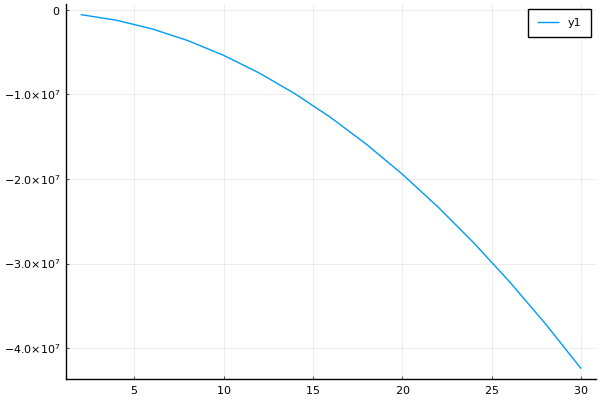

In [90]:
plot(nc, llhs)

In [69]:
data_train_cls_20, binStarts_20, binMean = getBins(data_train, 20) # city-specific
data_test_cls_20 = classify(data_test, binStarts_20);

In [73]:
data_train_cls_10, binStarts_10, binMean = getBins(data_train, 10) # city-specific
data_test_cls_10 = classify(data_test, binStarts_10);

In [19]:
?loglikelihood()

search: loglikelihood nullloglikelihood



```
loglikelihood(model::StatisticalModel)
```

Return the log-likelihood of the model.

---

```
loglikelihood(model::StatisticalModel, ::Colon)
```

Return a vector of each observation's contribution to the log-likelihood of the model. In other words, this is the vector of the pointwise log-likelihood contributions.

In general, `sum(loglikehood(model, :)) == loglikelihood(model)`.

---

```
loglikelihood(model::StatisticalModel, observation)
```

Return the contribution of `observation` to the log-likelihood of `model`.

---

```
loglikelihood(d::UnivariateDistribution, x::Union{Real,AbstractArray})
```

The log-likelihood of distribution `d` with respect to all samples contained in `x`.

Here `x` can be a single scalar sample or an array of samples.

---

```
loglikelihood(d::MultivariateDistribution, x::AbstractArray)
```

The log-likelihood of distribution `d` with respect to all samples contained in array `x`.

Here, `x` can be a vector of length `dim(d)`, a matrix with `dim(d)` rows, or an array of vectors of length `dim(d)`.

---

```
loglikelihood(d::MatrixDistribution, x::AbstractArray)
```

The log-likelihood of distribution `d` with respect to all samples contained in array `x`.

Here, `x` can be a matrix of size `size(d)`, a three-dimensional array with `size(d, 1)` rows and `size(d, 2)` columns, or an array of matrices of size `size(d)`.


In [56]:
llhTr = loglikelihood(Normal(), data_train)

-313009.91146532213

In [57]:
llhTe = loglikelihood(Normal(), data_test)

-21397.903364259386

In [62]:
llhTr = loglikelihood(Normal(), data_train_cls)

-4.241642988405506e7

In [70]:
llhTr_20 = loglikelihood(Normal(), data_train_cls_20)

-1.9446750384055227e7

In [74]:
llhTr_10 = loglikelihood(Normal(), data_train_cls_10)

-5.397357884055309e6

In [63]:
llhTe = loglikelihood(Normal(), data_test_cls)

-3.130544095888464e6

In [71]:
llhTe_20 = loglikelihood(Normal(), data_test_cls_20)

-1.4339175958884826e6

In [50]:
tr = fit(Normal, data_train)

Normal{Float64}(μ=0.6560004587373912, σ=0.266667624417318)

In [51]:
te = fit(Normal, data_test)

Normal{Float64}(μ=0.6905375446529478, σ=0.2561302274954425)

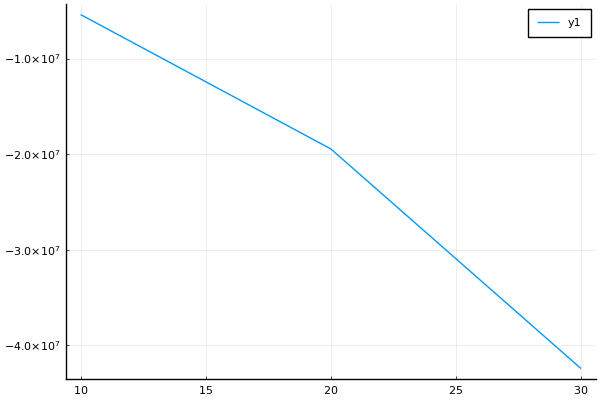

In [75]:
plot([10,20,30],[llhTr_10, llhTr_20, llhTr])

In [32]:
?logpdf

search: logpdf logpdf! gradlogpdf componentwise_logpdf



```
logpdf(d::UnivariateDistribution, x::Real)
```

Evaluate the logarithm of probability density (mass) at `x`.

See also: [`pdf`](@ref).

---

```
logpdf(d::MultivariateDistribution, x::AbstractArray)
```

Return the logarithm of probability density evaluated at `x`.

  * If `x` is a vector, it returns the result as a scalar.
  * If `x` is a matrix with n columns, it returns a vector `r` of length n, where `r[i]` corresponds to `x[:,i]`.

`logpdf!(r, d, x)` will write the results to a pre-allocated array `r`.

---

```
logpdf(d::MatrixDistribution, AbstractMatrix)
```

Compute the logarithm of the probability density at the input matrix `x`.

---

```
logpdf(d::Union{UnivariateMixture, MultivariateMixture}, x)
```

Evaluate the logarithm of the (mixed) probability density function over `x`. Here, `x` can be a single sample or an array of multiple samples.


In [68]:
logpdf(Normal(), data_test_cls)

17979-element Vector{Float64}:
  -41.418938533204674
  -41.418938533204674
   -5.418938533204673
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -2.9189385332046727
   -2.9189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
   -1.4189385332046727
    ⋮
  -32.918938533204674
  -25.418938533204674
  -25.418938533204674
  -25.418938533204674
  -41.418938533204674
  -61.418938533204674
  -72.91893853320467
  -98.91893853320467
 -113.41893853320467
 -113.41893853320467
 -181.41893853320468
 -265.41893853320465

In [60]:
logTr = logpdf(tr, data_train)

267607-element Vector{Float64}:
 -0.7390725965514602
 -0.749636184929457
 -0.9240713626038126
 -1.1783234851667956
 -1.3893323379861149
 -1.2883715572680885
 -0.26993290455632035
 -0.40655707004413544
 -0.19677151570201512
 -0.006964715412618672
 -0.5507346893012293
 -0.790886722827745
 -0.8046691133606088
  ⋮
 -0.3562744655647867
  0.05127298864727248
  0.19662686395729168
  0.039839927341740244
  0.3414563485281543
  0.33286117071197285
  0.35213004425142935
  0.14783879409896383
  0.12340973285210421
  0.21045757875799098
 -0.0026369544943598555
 -0.23750603510277846

In [53]:
llhTe = logpdf(te, data_test)

17979-element Vector{Float64}:
 -0.01752145846402109
 -0.05392801107719092
 -0.9083831516752008
 -1.6166132243464204
 -1.8422429123577257
 -1.7731328475780017
 -1.1029431387500688
 -1.1918485209662328
 -1.5216937402817672
 -1.5312426498579461
 -1.5428315219895616
 -1.5583213354757561
 -1.507881985765142
  ⋮
 -0.18503293299388468
 -0.33449135055410495
 -0.43436536144009863
 -0.36235717492673625
 -0.06179274438676452
  0.18161563814145
  0.3685574836507881
  0.4324253778135221
  0.43816881306510924
  0.43894165551833586
  0.2911193421612708
  0.05236366690123817

In [24]:
logliTe = log.(data_test)

17979-element Vector{Float64}:
 -0.8103734477009982
 -0.8320374233083325
 -1.3114217087068083
 -1.7679514969989036
 -1.9452681132189922
 -1.8885433055480856
 -1.4265113346931475
 -1.4811477213458324
 -1.6993526023968981
 -1.7061165219644234
 -1.7143651820632337
 -1.7254596994732307
 -1.689620593135623
  ⋮
 -0.9076992528436422
 -0.9912325096523066
 -1.0463249255396996
 -1.0066360789490105
 -0.8366726777590361
 -0.6825989110544289
 -0.5248884431861042
 -0.4260869537570588
 -0.33400131949324074
 -0.33689792777871597
 -0.1842073784687699
 -0.08668272175935691

KSDist(n=100)

#### mn ± sd 

In [41]:
h21 = hist_dif_pred_pers(df21, 2, 1)
h22 = hist_dif_pred_pers(df22, 2, 2)

In [43]:
h21_cls = hist_cls_dif_pred_pers(df21, 2, 1)
h22_cls = hist_cls_dif_pred_pers(df22, 2, 2)

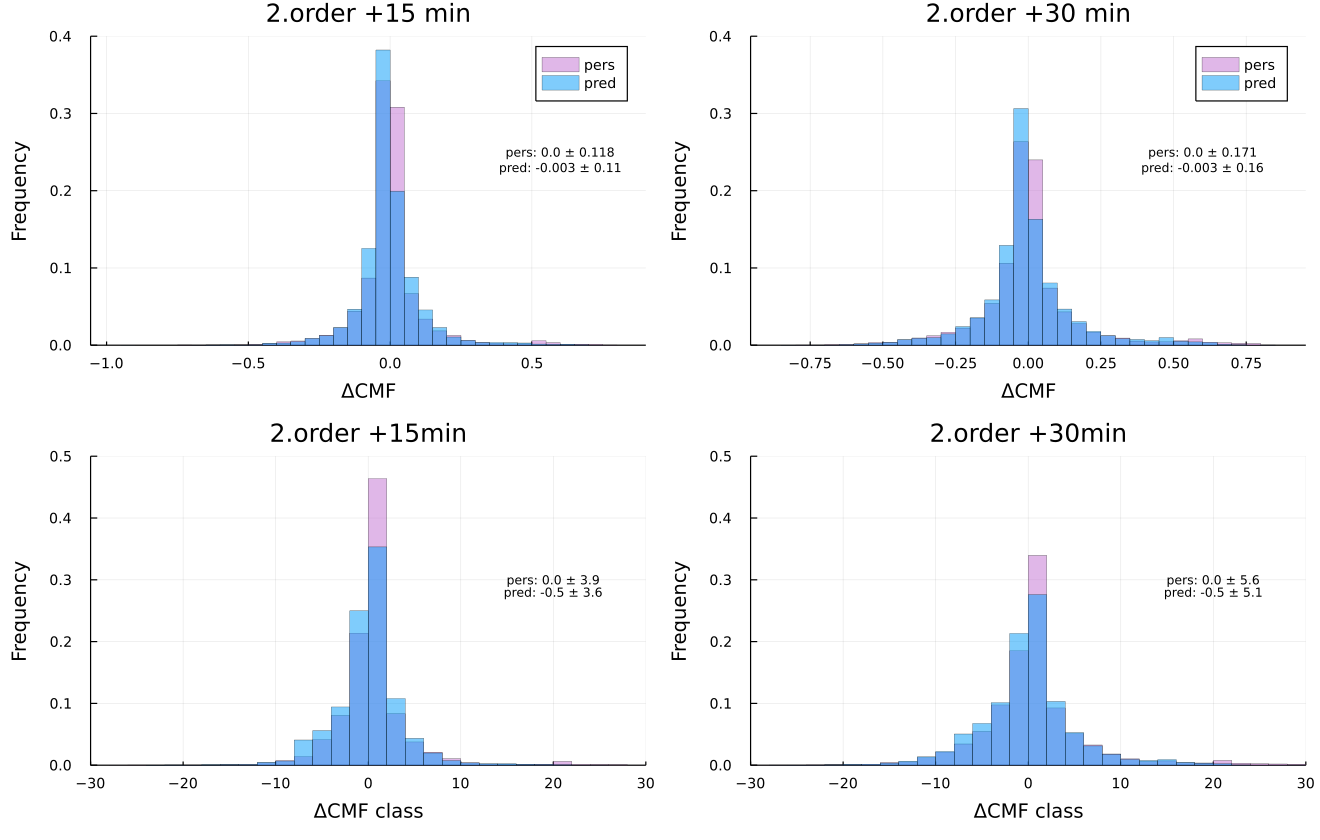

In [49]:
hists = plot(h21, h22, h21_cls, h22_cls, layout=@layout([a b; c d]), 
    leftmargin=20px, bottommargin=20px, dpi=120, fmt=:png, size=(1100,700))

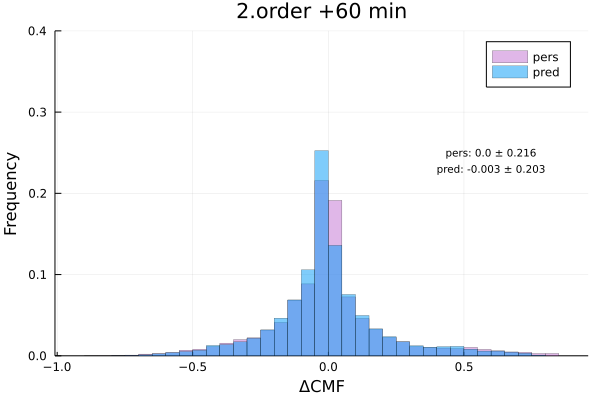

In [60]:
h23 = hist_dif_pred_pers(df23, 2, 3)
h24 = hist_dif_pred_pers(df24, 2, 4)

In [61]:
h23_cls = hist_cls_dif_pred_pers(df23, 2, 3)
h24_cls = hist_cls_dif_pred_pers(df24, 2, 4);

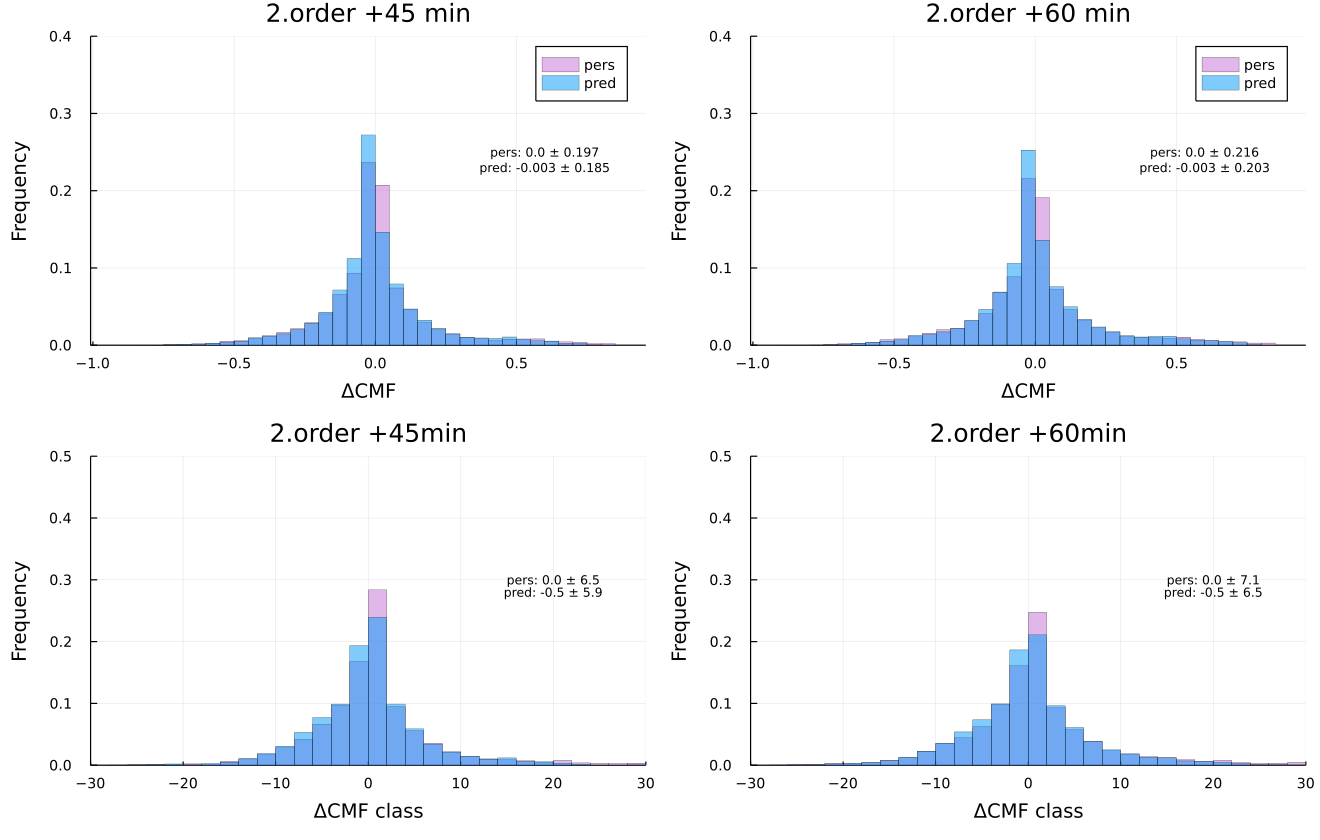

In [62]:
hists34 = plot(h23, h24, h23_cls, h24_cls, layout=@layout([a b; c d]), 
    leftmargin=20px, bottommargin=20px, dpi=120, fmt=:png, size=(1100,700))

In [24]:
function viz_mn_sd(df; tit="2. order +$(15*2) min", ylim1=0.35)
    gb = groupby(df, :real_cls)
    mns_real = [mean(g.real) for g in gb]
    mns_pers = [mean(g.pers) for g in gb]
    mns_pred = [mean(g.pred) for g in gb]
    mns_pred_n = [mean(g.pred_n) for g in gb];

    sds_real = [std(g.real) for g in gb]
    sds_pers = [std(g.pers) for g in gb]
    sds_pred = [std(g.pred) for g in gb]
    sds_pred_n = [std(g.pred_n) for g in gb];

    if df == df22 
        (ylab1, ylab2) = ("mean", "standard deviation") 
        leg1 = :bottomright
    else 
        (ylab1, ylab2) = ("", "")
        leg1 = :none
    end
    mns = plot(binMean, [mns_real, mns_pers, mns_pred, mns_pred_n], c=[3 4 1 7], leg=leg1, 
            ylabel=ylab1, title=tit)
    sds = plot(binMean, [sds_real, sds_pers, sds_pred, sds_pred_n], c=[3 4 1 7], leg=false, 
            xlabel="real CMF", ylabel=ylab2, ylim=(0,ylim1))
    return mns, sds
end

viz_mn_sd (generic function with 1 method)

In [29]:
mn2, sd2 = viz_mn_sd(df22)
mn3, sd3 = viz_mn_sd(df23; tit="+$(15*3) min")
mn4, sd4 = viz_mn_sd(df24; tit="+$(15*4) min")

(Plot{Plots.GRBackend() n=4}, Plot{Plots.GRBackend() n=4})

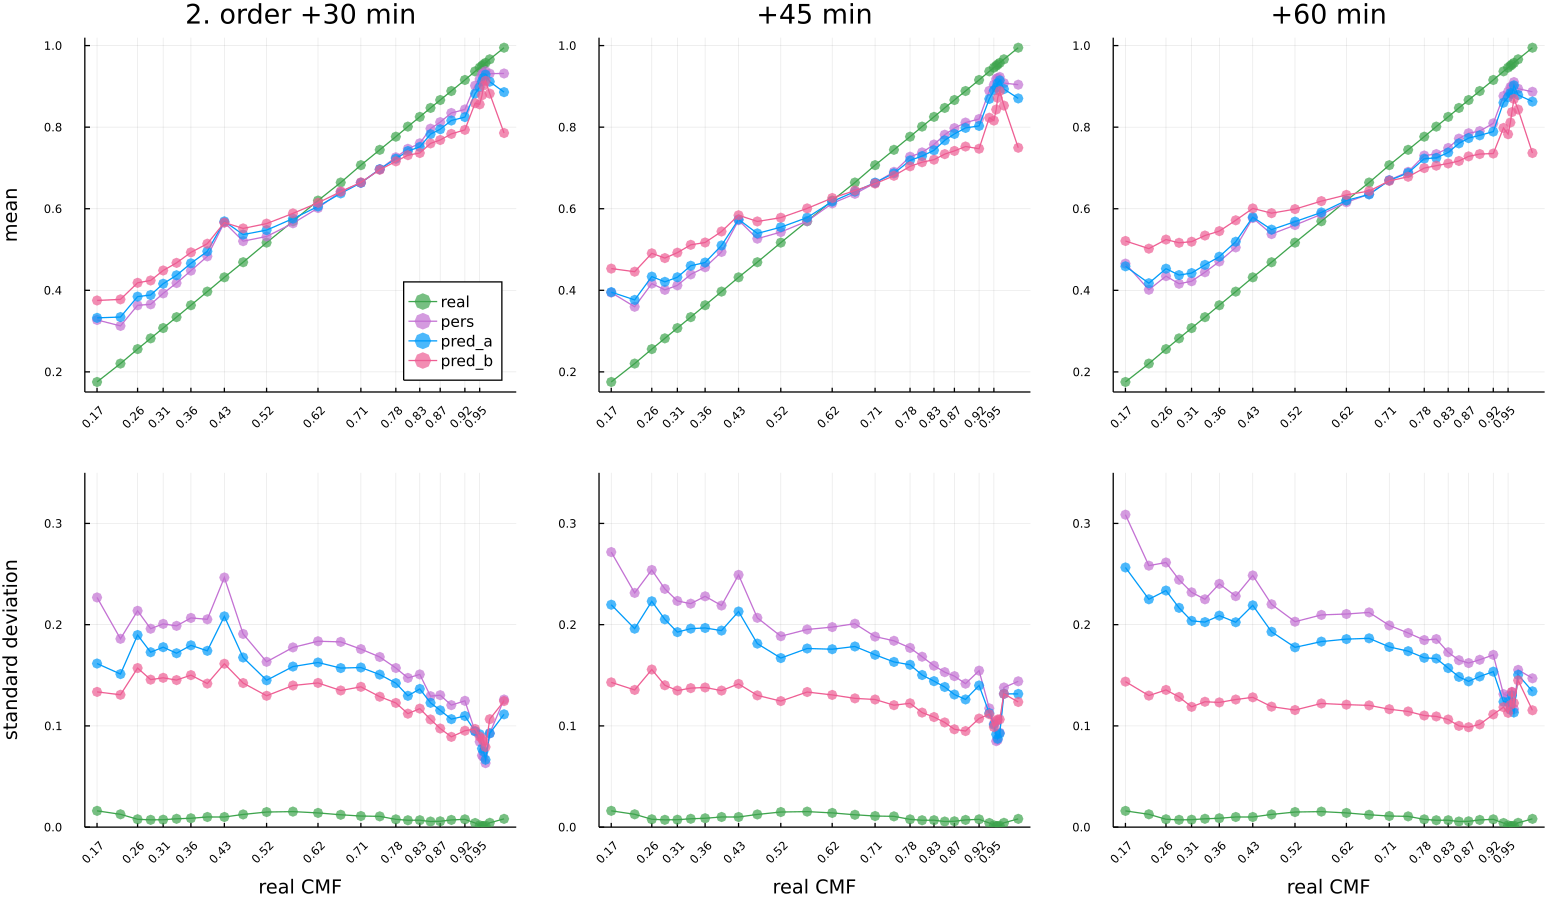

In [30]:
p = plot(mn2, mn3, mn4, sd2, sd3, sd4, layout=@layout([a b c; d e f]), marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b"],
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10,
    leftmargin=15px, bottommargin=15px, dpi=130, fmt=:png, size=(1200,700))

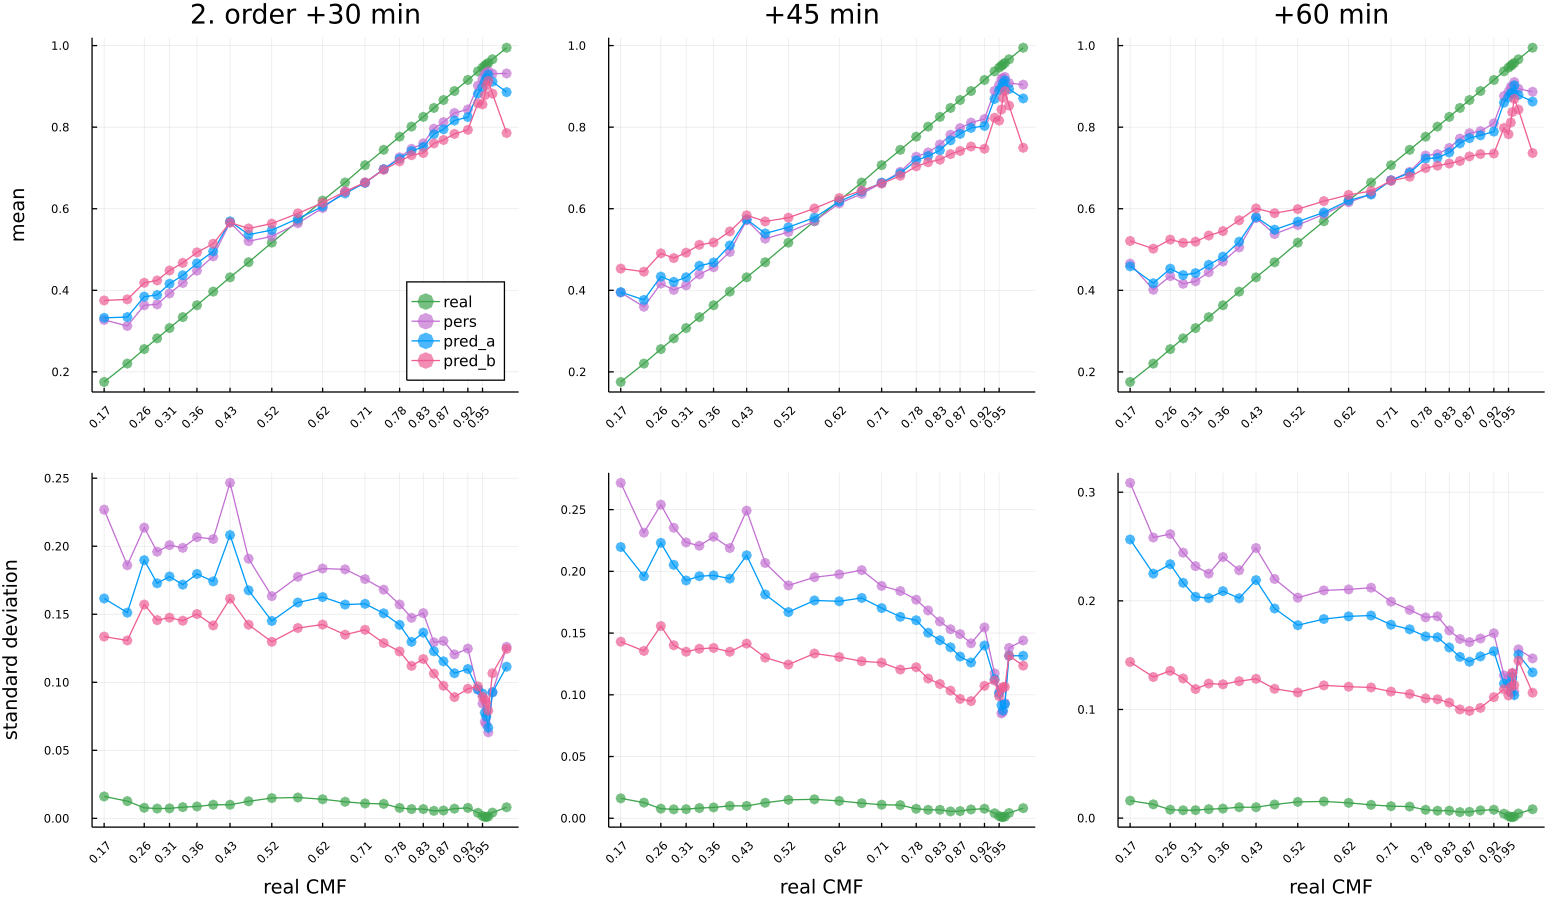

In [93]:
p = plot(mn2, mn3, mn4, sd2, sd3, sd4, layout=@layout([a b c; d e f]), marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b"],
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10,
    leftmargin=15px, bottommargin=15px, dpi=130, fmt=:png, size=(1200,700))

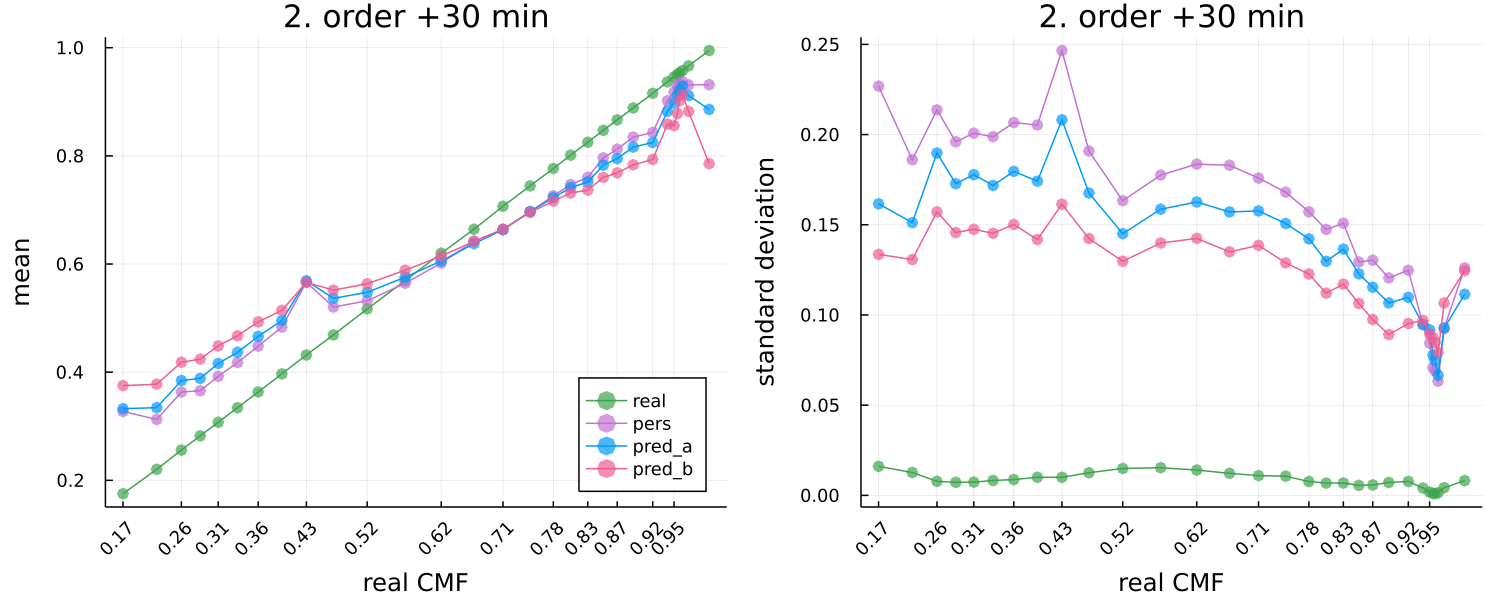

In [78]:
p = plot(mns, sds, marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b"],
    xticks=(binMean[1:2:26], ticks[1:2:26]), xrotation=45, 
    xlabel="real CMF", title="2. order +30 min",
    leftmargin=20px, bottommargin=20px, dpi=150, fmt=:png, size=(1000,400))

#### errors

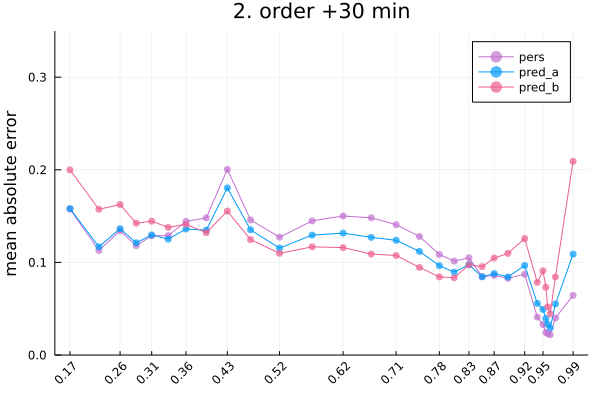

In [56]:
mae2 = viz_err(df22, binMean, xti; tit="2. order +$(15*2) min", err="mae")

In [53]:
mae3 = viz_err(df23, binMean, xti; tit="+$(15*3) min", err="mae")
mae4 = viz_err(df24, binMean, xti; tit="+$(15*4) min", err="mae")

rmse2 = viz_err(df22, binMean, xti; err="rmse")
rmse3 = viz_err(df23, binMean, xti; err="rmse")
rmse4 = viz_err(df24, binMean, xti; err="rmse");

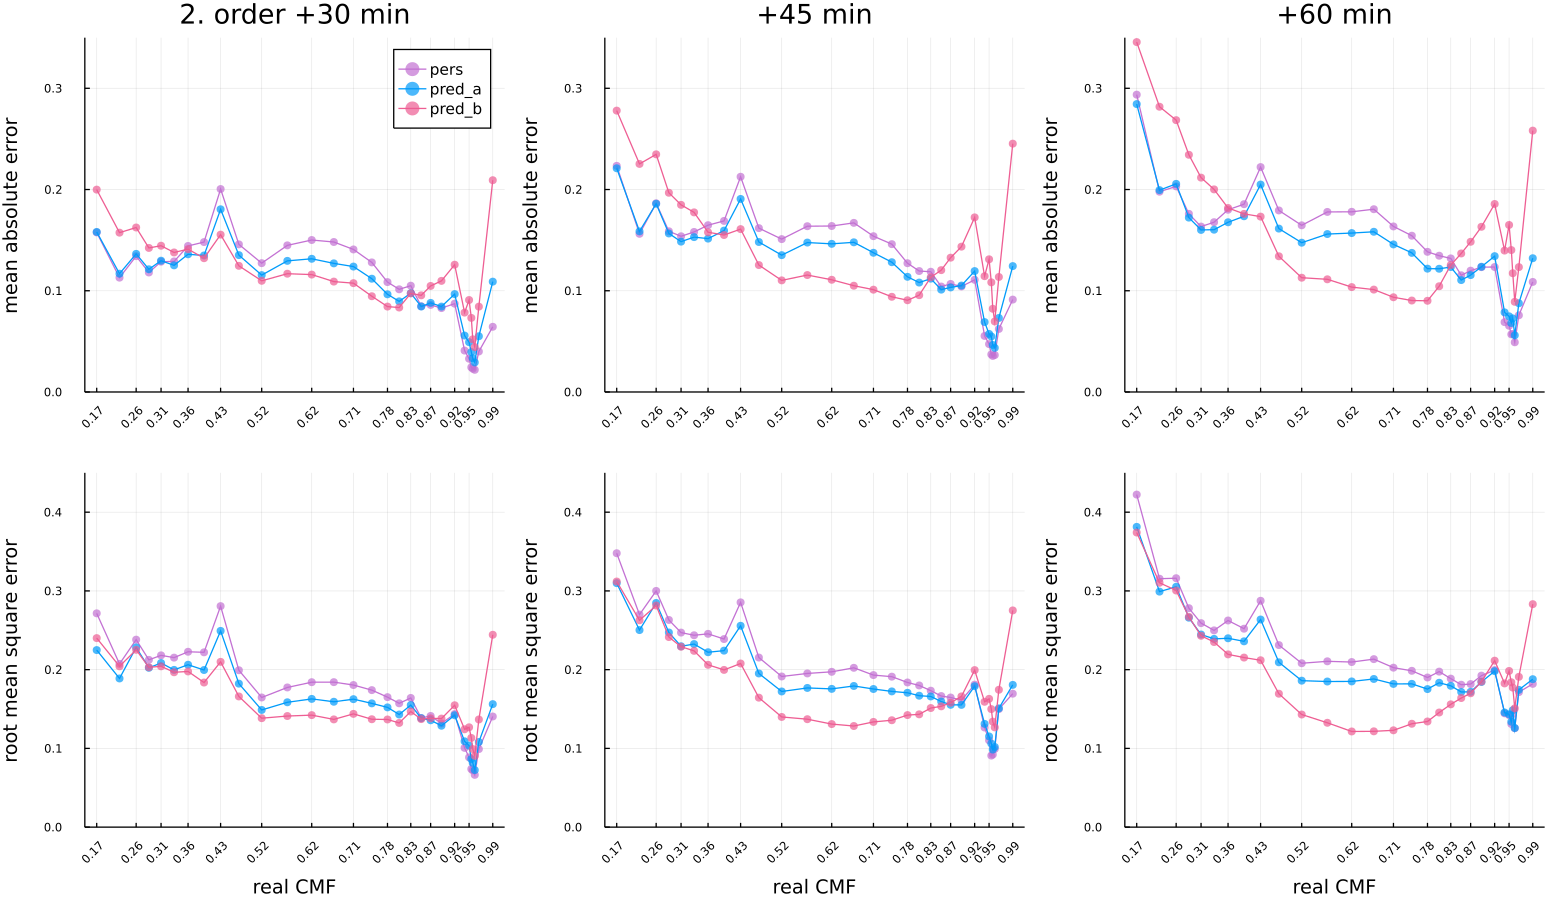

In [57]:
errs = plot(mae2, mae3, mae4, rmse2, rmse3, rmse4, layout=@layout([a b c; d e f]), 
    tickfontsize=6, labelfontsize=10,
    leftmargin=15px, bottommargin=15px, dpi=130, fmt=:png, size=(1200,700))

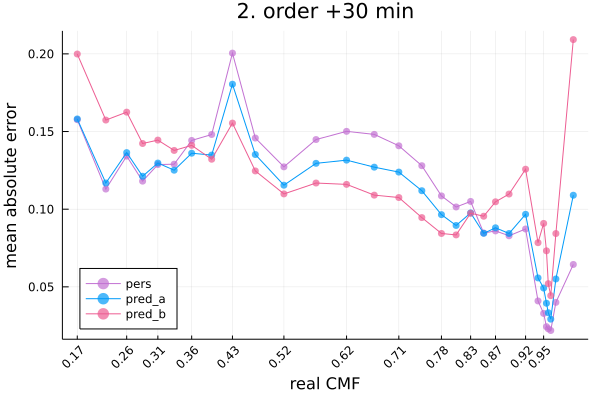

In [83]:
maes = viz_err(binMean, df22, tit; ticks=ticks, err="mae")

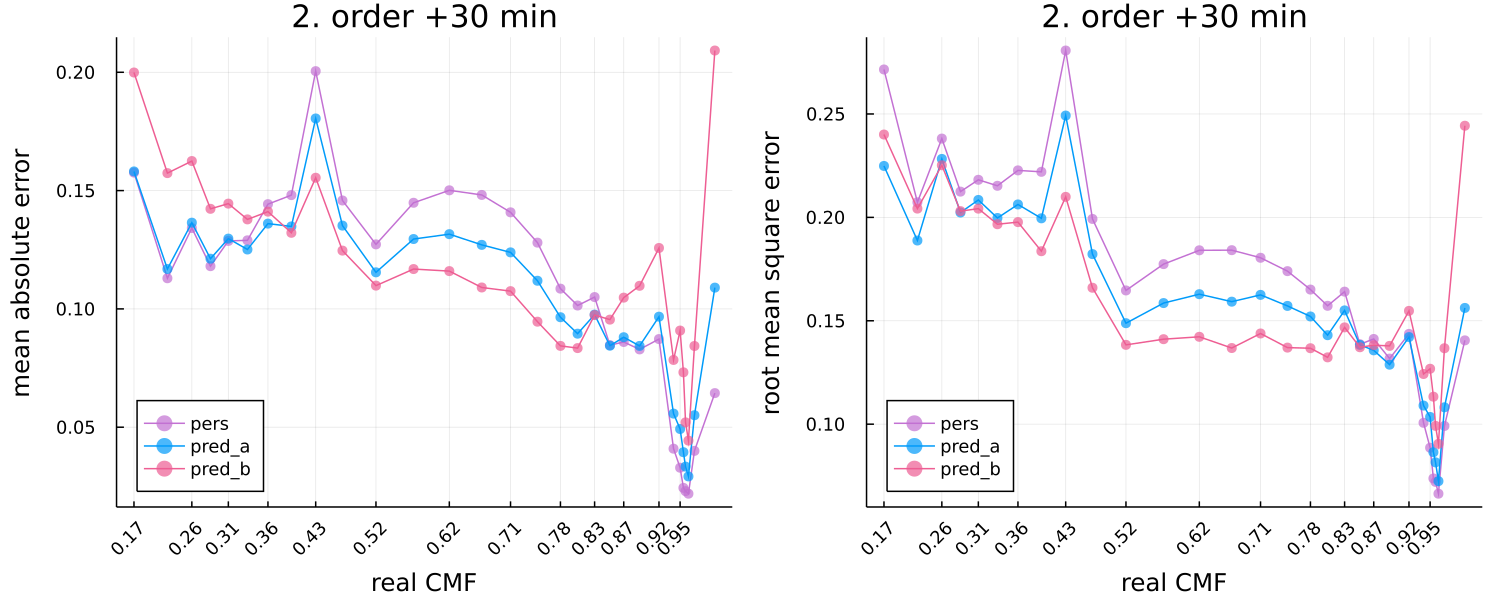

In [86]:
errs = plot(maes, rmses, layout=@layout([a b]), 
    leftmargin=20px, bottommargin=20px, dpi=150, fmt=:png, size=(1000,400))

##### rmse vs mae

In [15]:
gb = groupby(df21, :real_cls)

GroupedDataFrame with 30 groups based on key: real_cls
First Group (423 rows): real_cls = 1
 Row │ real      neib      pers      dif_neib    real_cls  pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred   dif_cls_pred 
     │ Float64   Float64   Float64   Float64     Int64     Int64     Float64      Int64         Float64   Int64     Float64    Int64        
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 0.170682  0.812441  0.269437   0.641759          1         3   0.0987544              2  0.263847         3  0.0931648             2
   2 │ 0.142949  0.577954  0.170682   0.435005          1         1   0.0277334              0  0.245249         3  0.1023                2
   3 │ 0.151292  0.40955   0.142949   0.258258          1         1  -0.00834314             0  0.213818         2  0.0625262             1
   4 │ 0.182802  0.13582   0.227377  -0.0469821         1         2   0.0445747              1  0.246403         3  0.0636016             2
   5 │ 0.18157   0.144917  0.182802  -0.0366527         1         1   0.00123228             0  0.219746         2  0.0381767             1
   6 │ 0.180078  0.117192  0.18157   -0.0628862         1         1   0.00149155             0  0.213818         2  0.0337402             1
   7 │ 0.178091  0.100783  0.180078  -0.0773083         1         1   0.00198684             0  0.213818         2  0.0357271             1
   8 │ 0.18459   0.10863   0.178091  -0.0759591         1         1  -0.00649838             0  0.213818         2  0.0292287             1
   9 │ 0.176252  0.261561  0.333573   0.0853084         1         6   0.157321               5  0.24985          3  0.0735978             2
  10 │ 0.18118   0.141936  0.176252  -0.0392435         1         1  -0.00492734             0  0.255008         3  0.0738286             2
  11 │ 0.197033  0.10173   0.221486  -0.0953026         1         2   0.0244531              1  0.281747         4  0.0847136             3
  ⋮  │    ⋮         ⋮         ⋮          ⋮          ⋮         ⋮           ⋮            ⋮           ⋮         ⋮          ⋮           ⋮
 413 │ 0.179336  0.108827  0.361652  -0.0705095         1         7   0.182316               6  0.355836         7  0.1765                6
 414 │ 0.184632  0.106678  0.179336  -0.0779534         1         1  -0.00529576             0  0.26738          3  0.0827479             2
 415 │ 0.165889  0.61278   0.355881   0.446891          1         7   0.189992               6  0.346817         6  0.180928              5
 416 │ 0.190261  0.113963  0.214134  -0.0762976         1         2   0.023873               1  0.250008         3  0.0597474             2
 417 │ 0.176517  0.413161  0.3559     0.236644          1         7   0.179383               6  0.35115          7  0.174634              6
 418 │ 0.179369  0.835469  0.422837   0.6561            1         9   0.243468               8  0.37353          7  0.194161              6
 419 │ 0.191017  0.863678  0.179369   0.672661          1         1  -0.0116474              0  0.213606         2  0.0225889             1
 420 │ 0.197843  0.880247  0.191017   0.682404          1         1  -0.00682613             0  0.213818         2  0.0159755             1
 421 │ 0.188337  0.826354  0.424252   0.638017          1         9   0.235915               8  0.37353          7  0.185193              6
 422 │ 0.184874  0.674196  0.201647   0.489321          1         2   0.0167722              1  0.278164         4  0.0932898             3
 423 │ 0.18662   0.817974  0.423038   0.631354          1         9   0.236418               8  0.37353          7  0.18691               6
                                                                                                                            401 rows omitted
⋮
Last Group (659 rows): real_cls = 30
 Row │ real      neib        pers      dif_neib    real_cls  pers_cls  dif_pers     dif_cls

In [ ]:
mae_pred_mn = 

In [16]:
mae_pred = [meanad(g.pred, g.real) for g in gb]
rmse_pred = [rmsd(g.pred, g.real) for g in gb]

30-element Vector{Float64}:
 0.09202257442007675
 0.102767970087372
 0.15659748067308354
 0.12372245344643576
 0.1317231985401227
 0.13493857826571976
 0.15538144541006627
 0.15872263955310972
 0.17049979889197536
 0.12765902917824623
 0.1230112467328569
 0.12941284531189504
 0.1457045973490152
 ⋮
 0.08651001457323215
 0.07533872115427949
 0.07204844310229386
 0.07068327096993758
 0.09918274570251301
 0.05964022457723588
 0.05868414788587678
 0.07417222339824402
 0.05717333676334434
 0.05384662798438102
 0.07002438029882203
 0.11836947788466319

In [20]:
mae_pers = [meanad(g.pers, g.real) for g in gb]
rmse_pers = [rmsd(g.pers, g.real) for g in gb]

30-element Vector{Float64}:
 0.08143106599366792
 0.09684319251120672
 0.16396607332868923
 0.13026238435150997
 0.13955044434578096
 0.1399955042009017
 0.16805434250311838
 0.1836648764698349
 0.24037992875028616
 0.15227939130765158
 0.13253798069845982
 0.14661785121307394
 0.164074803661812
 ⋮
 0.09695059530459134
 0.07490069440965777
 0.0741032395390549
 0.06814870325526906
 0.08091906653018122
 0.05182320538920928
 0.042463993340492424
 0.05638724797178758
 0.03822890166464344
 0.03443373125903733
 0.04395477346198682
 0.08420701138545404

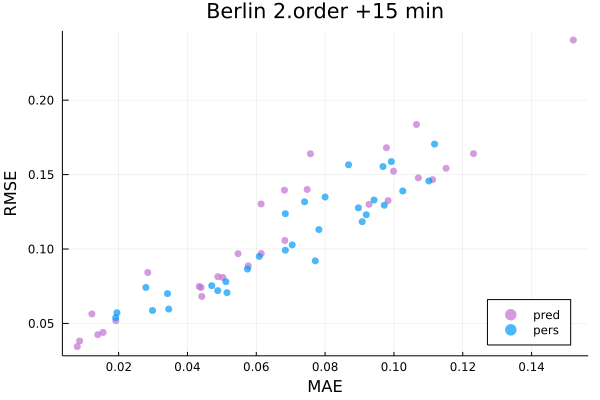

In [30]:
scatter([mae_pers mae_pred], [rmse_pers rmse_pred], marker=(0.7, stroke(0)), leg=:bottomright,
    c=[4 1], label=["pred" "pers"], 
    xlabel="MAE", ylabel="RMSE", title="Berlin 2.order +15 min")

####  boxplot

In [45]:
function viz_box(df, steps, tit; pred="pred")
    pred == "new" ? 
        (dif = df.dif_pred_n[1+steps:end]) :  
        (dif = df.dif_pred[1+steps:end])
    pred == "new" ? ylab = "pred_n" : ylab = "pred"
    b = boxplot(df.real_cls[1:end-steps], dif, leg=false, marker=(0.3, stroke(0)), lw=.7,
        xticks=(1:2:30, ticks[1:2:30]), xrotation=45,
        title=tit, xlabel="real CMF class mean at t", ylabel="dif ($(ylab) - real)")
    return b
end

viz_box (generic function with 1 method)

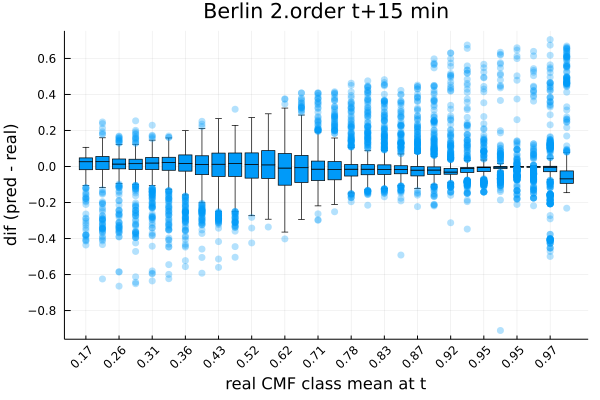

In [53]:
b21 = viz_box(df21, 1, "Berlin 2.order t+$(15*1) min")

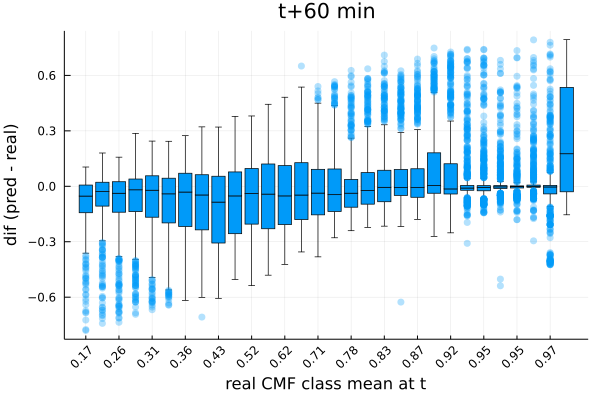

In [51]:
b22 = viz_box(df22, 2, "t+$(15*2) min")
b23 = viz_box(df23, 3, "t+$(15*3) min")
b24 = viz_box(df24, 4, "t+$(15*4) min");

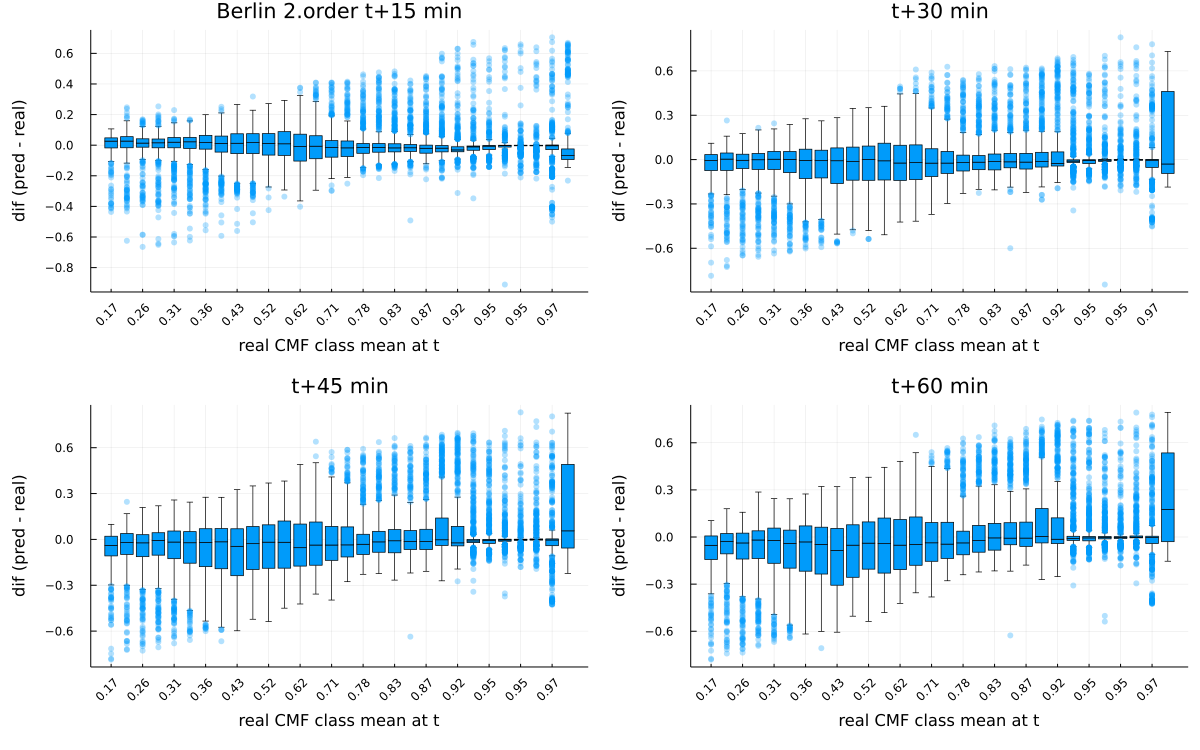

In [54]:
boxes2 = plot(b21, b22, b23, b24, layout=@layout([a b; c d]), size=(1200, 750), 
    left_margin=25px, bottom_margin=25px, fmt=:png)

#### Corr with neighbor

In [14]:
fn_berlin_w  = "irradiation_Berlin_W.nc";

In [6]:
fn_berlin_sw = "irradiation_Berlin_SW.nc"
fn_berlin_s  = "irradiation_Berlin_S.nc"
fn_berlin_se = "irradiation_Berlin_SE.nc"
fn_berlin_e  = "irradiation_Berlin_E.nc"
fn_berlin_ne = "irradiation_Berlin_NE.nc"
fn_berlin_n  = "irradiation_Berlin_N.nc"
fn_berlin_nw = "irradiation_Berlin_NW.nc";

In [90]:
h_train_w = histogram(data_train_w, bins=binStarts_w, ylabel="Counts", title="Berlin W train (2004_02-2018_12)")

LoadError: UndefVarError: binStarts_w not defined

In [91]:
h_test_w = histogram(data_test_w, bins=binStarts_w, title="test W (2019)")

LoadError: UndefVarError: binStarts_w not defined

In [20]:
function getCMFraw(fn)
    fn_ = joinpath("data", fn)    
    ghi = getNCvar(fn_, "GHI")
    ghiCS = getNCvar(fn_, "CLEAR_SKY_GHI");
    cmf = ghi ./ ghiCS
    return cmf
end

getCMFraw (generic function with 1 method)

In [21]:
cmf_c = getCMFraw(fn_berlin);

In [23]:
cmf_w = getCMFraw(fn_berlin_w);

In [8]:
cmf_n = getCMFraw(fn_berlin_n)
cmf_e = getCMFraw(fn_berlin_e)
cmf_s = getCMFraw(fn_berlin_s)

cmf_sw = getCMFraw(fn_berlin_sw)
cmf_se = getCMFraw(fn_berlin_se)
cmf_ne = getCMFraw(fn_berlin_ne)
cmf_nw = getCMFraw(fn_berlin_nw)

558048-element Vector{Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [15]:
function cor_neib(cmf_c, cmf_neib)
    df = DataFrame(:c => cmf_c[2:end], :neib => cmf_neib[1:end-1])
    filter!([:c, :neib] => (c, n) -> !isnan(c) && !isnan(n), df)
    return cor(df.c, df.neib)
end

cor_neib (generic function with 1 method)

In [24]:
function cor_neib(cmf_c, cmf_neib; steps=1)
    df = DataFrame(:c => cmf_c[1+steps:end], :neib => cmf_neib[1:end-steps])
    filter!([:c, :neib] => (c, n) -> !isnan(c) && !isnan(n), df)
    return cor(df.c, df.neib)
end

cor_neib (generic function with 1 method)

In [28]:
cor_w4 = cor_neib(cmf_c, cmf_w, steps=4)

0.7061034396660855

In [27]:
cor_w3 = cor_neib(cmf_c, cmf_w, steps=3)

0.7334308590909605

In [26]:
cor_w2 = cor_neib(cmf_c, cmf_w, steps=2)

0.753450942181342

In [24]:
cor_w = cor_neib(cmf_c, cmf_w)

0.7501867497056166

In [11]:
cor_n = cor_neib(cmf_c, cmf_n)
cor_e = cor_neib(cmf_c, cmf_e)
cor_s = cor_neib(cmf_c, cmf_s)

cor_sw = cor_neib(cmf_c, cmf_sw)
cor_se = cor_neib(cmf_c, cmf_se)
cor_ne = cor_neib(cmf_c, cmf_ne)
cor_nw = cor_neib(cmf_c, cmf_nw)

In [21]:
cor_mat = reshape([
    cor_sw, cor_s, cor_se,    
    cor_w,     1,  cor_e,
    cor_nw, cor_n, cor_ne
], 3, 3);

corMat = rd.(cor_mat, 3);

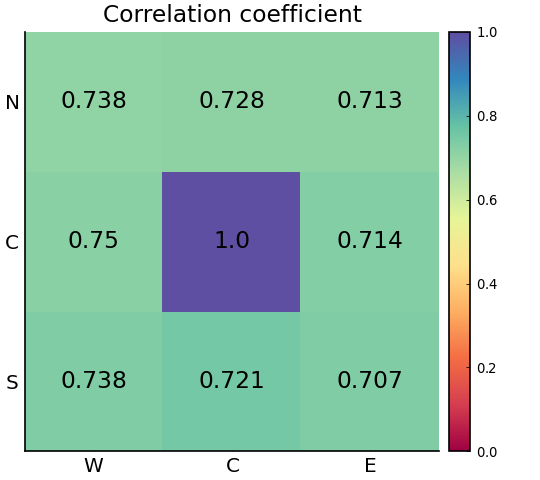

In [22]:
hm = heatmap(1:3, 1:3, cor_mat, c=palette(:Spectral_10), clim=(0,1), dpi=120, size=(450,400), title="Correlation coefficient",
    xticks=(1:3, ["W", "C", "E"]), yticks=(1:3, ["S", "C", "N"]), tickfontsize=12);
for i=1:3, j=1:3
    annotate!(i,j, corMat[i, j])
end
hm 

### neighbor CMF

In [11]:
test = getCMF(fn_berlin; raw=1)[2];

In [12]:
test_neib_w = getCMF(fn_berlin_w; raw=1)[2];

In [13]:
df21 = getDF(2, 1, N; test_neib=test_neib_w)

17977×12 DataFrame
   Row │ real      neib      pers      dif_neib    real_cls  pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred     dif_cls_pred 
       │ Float64   Float64   Float64   Float64     Int64     Int64     Float64      Int64         Float64   Int64     Float64      Int64        
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 0.269437  0.622668  0.435162   0.353231          3         9   0.165725               6  0.437789         9   0.168352               6
     2 │ 0.170682  0.812441  0.269437   0.641759          1         3   0.0987544              2  0.263847         3   0.0931648              2
     3 │ 0.142949  0.577954  0.170682   0.435005          1         1   0.0277334              0  0.245249         3   0.1023                 2
     4 │ 0.151292  0.40955   0.142949   0.258258          1         1  -0.00834314             0  0.213818         2   0.0625262              1
     5 │ 0.240145  0.188798  0.151292  -0.0513477         2         1  -0.0888532             -1  0.213818         2  -0.026327               0
     6 │ 0.227377  0.147695  0.240145  -0.0796814         2         2   0.0127687              0  0.281747         4   0.05437                2
     7 │ 0.182802  0.13582   0.227377  -0.0469821         1         2   0.0445747              1  0.246403         3   0.0636016              2
     8 │ 0.18157   0.144917  0.182802  -0.0366527         1         1   0.00123228             0  0.219746         2   0.0381767              1
     9 │ 0.180078  0.117192  0.18157   -0.0628862         1         1   0.00149155             0  0.213818         2   0.0337402              1
    10 │ 0.178091  0.100783  0.180078  -0.0773083         1         1   0.00198684             0  0.213818         2   0.0357271              1
    11 │ 0.18459   0.10863   0.178091  -0.0759591         1         1  -0.00649838             0  0.213818         2   0.0292287              1
   ⋮   │    ⋮         ⋮         ⋮          ⋮          ⋮         ⋮           ⋮            ⋮           ⋮         ⋮           ⋮            ⋮
 17968 │ 0.351226  0.279701  0.371119  -0.0715251         7         7   0.0198928              0  0.380428         8   0.0292019              1
 17969 │ 0.365446  0.271922  0.351226  -0.093524          7         7  -0.0142201              0  0.386635         8   0.0211884              1
 17970 │ 0.433149  0.29481   0.365446  -0.138339          9         7  -0.0677031             -2  0.386635         8  -0.0465147             -1
 17971 │ 0.505302  0.335291  0.433149  -0.170011         11         9  -0.0721527             -2  0.48402         10  -0.021282              -1
 17972 │ 0.591621  0.393995  0.505302  -0.197627         12        11  -0.0863193             -1  0.569766        12  -0.0218553              0
 17973 │ 0.65306   0.46773   0.591621  -0.18533          14        12  -0.0614382             -2  0.598229        13  -0.0548304             -1
 17974 │ 0.716053  0.513913  0.65306   -0.20214          15        14  -0.0629933             -1  0.693071        15  -0.0229814              0
 17975 │ 0.713982  0.624106  0.716053  -0.0898753        15        15   0.00207112             0  0.721304        15   0.00732246             0
 17976 │ 0.831763  0.677246  0.713982  -0.154517         19        15  -0.117782              -4  0.714744        15  -0.117019              -4
 17977 │ 0.916968  0.638925  0.831763  -0.278043         23        19  -0.0852047             -4  0.810114        18  -0.106854              -5
                                                                                                                              17956 rows omitted

In [8]:
test_neib_sw = getCMF(fn_berlin_sw; raw=1)[2]
test_neib_nw = getCMF(fn_berlin_nw; raw=1)[2]

test_neib_s = getCMF(fn_berlin_s; raw=1)[2]

test_neib_se = getCMF(fn_berlin_se; raw=1)[2]
test_neib_ne = getCMF(fn_berlin_ne; raw=1)[2]

In [143]:
df22_s = getDF(2, 2, N; test_neib=test_neib_s)

17976×16 DataFrame
   Row │ real      neib      pers      real_cls  pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred    dif_cls_pred  dif_neib    pred_n    pred_cls_n  dif_pred_n   dif_cls_pred_n 
       │ Float64   Float64   Float64   Int64     Int64     Float64      Int64         Float64   Int64     Float64     Int64         Float64     Float64   Int64       Float64      Int64          
───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 0.170682  0.816105  0.435162         1         9   0.264479               8  0.437789         9   0.267107              8   0.645423   0.437789           9   0.267107                 8
     2 │ 0.142949  0.58129   0.269437         1         3   0.126488               2  0.263847         3   0.120898              2   0.438341   0.276249           4   0.1333                   3
     3 │ 0.151292  0.413393  0.170682         1         1   0.0193902              0  0.245249         3   0.0939568             2   0.262101   0.314274           5   0.162982                 4
     4 │ 0.240145  0.213271  0.142949         2         1  -0.0971964             -1  0.213818         2  -0.026327              0  -0.0268744  0.281747           4   0.0416014                2
     5 │ 0.227377  0.16343   0.151292         2         1  -0.0760845             -1  0.213818         2  -0.0135584             0  -0.063947   0.281747           4   0.05437                  2
     6 │ 0.182802  0.156667  0.240145         1         2   0.0573434              1  0.281747         4   0.0989448             3  -0.0261345  0.328775           6   0.145973                 5
     7 │ 0.18157   0.151836  0.227377         1         2   0.045807               1  0.246403         3   0.0648339             2  -0.0297338  0.296921           5   0.115352                 4
     8 │ 0.180078  0.118497  0.182802         1         1   0.00272383             0  0.219746         2   0.0396683             1  -0.0615806  0.281747           4   0.101669                 3
     9 │ 0.178091  0.104174  0.18157          1         1   0.00347838             0  0.213818         2   0.0357271             1  -0.0739175  0.281747           4   0.103655                 3
    10 │ 0.18459   0.13511   0.180078         1         1  -0.00451154             0  0.213818         2   0.0292287             1  -0.0494792  0.281747           4   0.0971571                3
    11 │ 0.279361  0.175311  0.178091         4         1  -0.10127               -3  0.213818         2  -0.0655429            -2  -0.10405    0.281747           4   0.00238554               0
   ⋮   │    ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮          ⋮            ⋮            ⋮          ⋮          ⋮            ⋮             ⋮
 17967 │ 0.351226  0.23102   0.403451         7         8   0.0522252              1  0.411875         8   0.0606485             1  -0.120207   0.415747           9   0.0645211                2
 17968 │ 0.365446  0.253371  0.371119         7         7   0.00567275             0  0.380428         8   0.0149818             1  -0.112075   0.437017           9   0.0715711                2
 17969 │ 0.433149  0.269236  0.351226         9         7  -0.0819232             -2  0.386635         8  -0.0465147            -1  -0.163913   0.437017           9   0.00386798               0
 17970 │ 0.505302  0.315908  0.365446        11         7  -0.139856              -4  0.386635         8  -0.118667             -3  -0.189394   0.437017           9  -0.0682847               -2
 17971 │ 0.591621  0.380269  0.433149        12         9  -0.158472              -3  0.48402         10  -0.107601             -2  -0.211353   0.526605          11  -0.0650163               -1
 17972 │ 0.65306   0.463143  0.505302        14        11  -0.147758              -3  0.569766        12 

#### reliability

In [84]:
data_train_cls, binStarts, binMean = getBins(data_train, N; op="el")
data_test_cls = classify(data_test, binStarts);

In [58]:
data_train_cls, binStarts, binMean = getBins(data_train, 10) # city-specific
data_test_cls = classify(data_test, binStarts);

In [72]:
data_train_cls, binStarts, binMean = getBins(data_train, 20) # city-specific
data_test_cls = classify(data_test, binStarts);

In [85]:
df22_el = getDF(2, 2, N)

LoadError: BoundsError: attempt to access 900×30 Matrix{Float64} at index [91, 0]

In [59]:
df22_ = getDF(2, 2, 10)

17976×16 DataFrame
   Row │ real      neib      pers      real_cls  pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred     dif_cls_pred  dif_neib    pred_n    pred_cls_n  dif_pred_n   dif_cls_pred_n 
       │ Float64   Float64   Float64   Int64     Int64     Float64      Int64         Float64   Int64     Float64      Int64         Float64     Float64   Int64       Float64      Int64          
───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 0.170682  0.812441  0.435162         1         3   0.264479               2  0.423986         3   0.253304               2   0.641759   0.423986           3   0.253304                 2
     2 │ 0.142949  0.577954  0.269437         1         1   0.126488               0  0.304889         2   0.16194                1   0.435005   0.348972           3   0.206024                 2
     3 │ 0.151292  0.40955   0.170682         1         1   0.0193902              0  0.255325         1   0.104033               0   0.258258   0.255325           1   0.104033                 0
     4 │ 0.240145  0.188798  0.142949         1         1  -0.0971964              0  0.255325         1   0.0151802              0  -0.0513477  0.255325           1   0.0151802                0
     5 │ 0.227377  0.147695  0.151292         1         1  -0.0760845              0  0.255325         1   0.0279489              0  -0.0796814  0.255325           1   0.0279489                0
     6 │ 0.182802  0.13582   0.240145         1         1   0.0573434              0  0.255325         1   0.0725236              0  -0.0469821  0.255325           1   0.0725236                0
     7 │ 0.18157   0.144917  0.227377         1         1   0.045807               0  0.255325         1   0.0737559              0  -0.0366527  0.255325           1   0.0737559                0
     8 │ 0.180078  0.117192  0.182802         1         1   0.00272383             0  0.255325         1   0.0752474              0  -0.0628862  0.255325           1   0.0752474                0
     9 │ 0.178091  0.100783  0.18157          1         1   0.00347838             0  0.255325         1   0.0772343              0  -0.0773083  0.255325           1   0.0772343                0
    10 │ 0.18459   0.10863   0.180078         1         1  -0.00451154             0  0.255325         1   0.0707359              0  -0.0759591  0.255325           1   0.0707359                0
    11 │ 0.279361  0.114368  0.178091         2         1  -0.10127               -1  0.255325         1  -0.0240356             -1  -0.164993   0.255325           1  -0.0240356               -1
   ⋮   │    ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮           ⋮            ⋮            ⋮          ⋮          ⋮            ⋮             ⋮
 17967 │ 0.351226  0.279701  0.403451         3         3   0.0522252              0  0.42237          3   0.0711434              0  -0.0715251  0.423986           3   0.0727598                0
 17968 │ 0.365446  0.271922  0.371119         3         3   0.00567275             0  0.423986         3   0.0585397              0  -0.093524   0.423986           3   0.0585397                0
 17969 │ 0.433149  0.29481   0.351226         3         3  -0.0819232              0  0.423986         3  -0.00916339             0  -0.138339   0.423986           3  -0.00916339               0
 17970 │ 0.505302  0.335291  0.365446         4         3  -0.139856              -1  0.423986         3  -0.0813161             -1  -0.170011   0.423986           3  -0.0813161               -1
 17971 │ 0.591621  0.393995  0.433149         4         3  -0.158472              -1  0.423986         3  -0.167635              -1  -0.197627   0.423986           3  -0.167635                -1
 17972 │ 0.65306   0.46773   0.505302         5         4  -0.147758              -1 

In [73]:
df22__ = getDF(2, 2, 20)

17976×16 DataFrame
   Row │ real      neib      pers      real_cls  pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred      dif_cls_pred  dif_neib    pred_n    pred_cls_n  dif_pred_n  dif_cls_pred_n 
       │ Float64   Float64   Float64   Int64     Int64     Float64      Int64         Float64   Int64     Float64       Int64         Float64     Float64   Int64       Float64     Int64          
───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 0.170682  0.812441  0.435162         1         6   0.264479               5  0.438058         6   0.267376                5   0.641759   0.438058           6   0.267376                5
     2 │ 0.142949  0.577954  0.269437         1         2   0.126488               1  0.306434         3   0.163485                2   0.435005   0.332449           4   0.1895                  3
     3 │ 0.151292  0.40955   0.170682         1         1   0.0193902              0  0.238819         2   0.0875266               1   0.258258   0.29164            3   0.140348                2
     4 │ 0.240145  0.188798  0.142949         2         1  -0.0971964             -1  0.226985         2  -0.0131598               0  -0.0513477  0.29164            3   0.0514945               1
     5 │ 0.227377  0.147695  0.151292         2         1  -0.0760845             -1  0.226985         2  -0.000391134             0  -0.0796814  0.29164            3   0.0642632               1
     6 │ 0.182802  0.13582   0.240145         1         2   0.0573434              1  0.29164          3   0.108838                2  -0.0469821  0.332449           4   0.149647                3
     7 │ 0.18157   0.144917  0.227377         1         2   0.045807               1  0.271372         3   0.0898027               2  -0.0366527  0.332449           4   0.150879                3
     8 │ 0.180078  0.117192  0.182802         1         1   0.00272383             0  0.238819         2   0.0587406               1  -0.0628862  0.29164            3   0.111562                2
     9 │ 0.178091  0.100783  0.18157          1         1   0.00347838             0  0.226985         2   0.0488943               1  -0.0773083  0.29164            3   0.113549                2
    10 │ 0.18459   0.10863   0.180078         1         1  -0.00451154             0  0.226985         2   0.0423959               1  -0.0759591  0.29164            3   0.10705                 2
    11 │ 0.279361  0.114368  0.178091         3         1  -0.10127               -2  0.226985         2  -0.0523756              -1  -0.164993   0.29164            3   0.0122787               0
   ⋮   │    ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮           ⋮             ⋮            ⋮          ⋮          ⋮           ⋮             ⋮
 17967 │ 0.351226  0.279701  0.403451         5         6   0.0522252              1  0.439863         6   0.0886366               1  -0.0715251  0.438058           6   0.086832                1
 17968 │ 0.365446  0.271922  0.371119         5         5   0.00567275             0  0.397535         6   0.0320891               1  -0.093524   0.465929           7   0.100483                2
 17969 │ 0.433149  0.29481   0.351226         6         5  -0.0819232             -1  0.396879         6  -0.0362704               0  -0.138339   0.465929           7   0.0327799               1
 17970 │ 0.505302  0.335291  0.365446         7         5  -0.139856              -2  0.396879         6  -0.108423               -1  -0.170011   0.465929           7  -0.0393728               0
 17971 │ 0.591621  0.393995  0.433149         8         6  -0.158472              -2  0.465929         7  -0.125692               -1  -0.197627   0.533667           8  -0.0579545               0
 17972 │ 0.65306   0.46773   0.505302         9         7  -0.147758              -2 

In [74]:
gb = groupby(df22__, :pred_cls)

GroupedDataFrame with 20 groups based on key: pred_cls
First Group (3 rows): pred_cls = 1
 Row │ real      neib      pers      real_cls  pers_cls  dif_pers    dif_cls_pers  pred      pred_cls  dif_pred    dif_cls_pred  dif_neib      pred_n    pred_cls_n  dif_pred_n  dif_cls_pred_n 
     │ Float64   Float64   Float64   Int64     Int64     Float64     Int64         Float64   Int64     Float64     Int64         Float64       Float64   Int64       Float64     Int64          
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 0.435725  0.336179  0.340589         6         4  -0.0951352            -2  0.211261         1  -0.224464             -5  -0.0995456    0.247374           2  -0.188351               -4
   2 │ 0.554387  0.53473   0.949353         8        17   0.394966              9  0.0              1  -0.554387             -7  -0.0196573    0.0                1  -0.554387               -7
   3 │ 0.194593  0.193753  0.34784          1         4   0.153247              3  0.211261         1   0.0166679             0  -0.000840294  0.247374           2   0.0527808               1
⋮
Last Group (1 row): pred_cls = 20
 Row │ real      neib      pers      real_cls  pers_cls  dif_pers   dif_cls_pers  pred      pred_cls  dif_pred     dif_cls_pred  dif_neib    pred_n    pred_cls_n  dif_pred_n  dif_cls_pred_n 
     │ Float64   Float64   Float64   Int64     Int64     Float64    Int64         Float64   Int64     Float64      Int64         Float64     Float64   Int64       Float64     Int64          
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 0.974862  0.881391  0.854984        20        14  -0.119878            -6  0.972139        20  -0.00272283             0  -0.0934715  0.917701          16  -0.0571613              -4

In [75]:
pred_mn = [mean(g.pred) for g in gb]

20-element Vector{Float64}:
 0.14084055614575133
 0.23249875022559488
 0.28201282023300206
 0.3217413116455796
 0.3660832413466893
 0.41900521758231246
 0.4902873336648194
 0.5575062973647888
 0.6316480865296256
 0.6976245665390056
 0.7491000426796237
 0.794887204472707
 0.8308882790136427
 0.8653985936281534
 0.8964601266934766
 0.9223060151922436
 0.9429164523099903
 0.9513919894226467
 0.9560118575740151
 0.972139231128456

In [76]:
len = length(gb)
rFs = zeros(len)
for i in 1:len
    g = gb[i]
    sdf = filter([:real_cls, :pred_cls] => (r, p) -> isequal(r, p), g)
    rFs[i] = size(sdf, 1) / size(g, 1)
end
rFs

20-element Vector{Float64}:
 0.3333333333333333
 0.22653721682847897
 0.20754716981132076
 0.19408740359897173
 0.16301969365426697
 0.1730612244897959
 0.1797884841363102
 0.1699530516431925
 0.16414435389988358
 0.14823261117445838
 0.17129977460555973
 0.20519713261648745
 0.14142049025769957
 0.1185929648241206
 0.06594773952716715
 0.0926517571884984
 0.5937961595273265
 0.5800524934383202
 0.6244444444444445
 1.0

In [77]:
mean(rFs)

0.2776553749499818

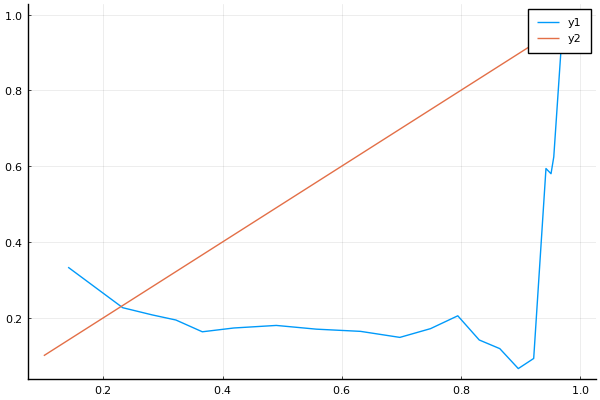

In [79]:
plot(pred_mn, rFs)
plot!(0.1:0.1:1, 0.1:0.1:1)

#### hist 
pers vs pred vs neib

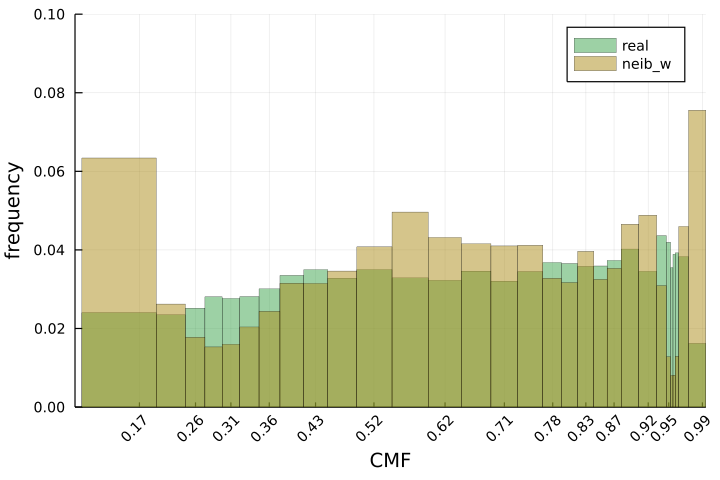

In [94]:
h1 = histogram(df21.real, normalize=:probability, bin=binStarts, label="real", 
    color=3, lw=0.2, fillalpha=0.5)
histogram!(df21.neib, normalize=:probability, bin=binStarts, label="neib_w",
    color=5, lw=0.2, fillalpha=0.5,
    xlim=(0.08, 1), ylim=(0,0.1), xticks=xti, xrotation=45,
    xlabel="CMF", ylabel="frequency", dpi=:120)

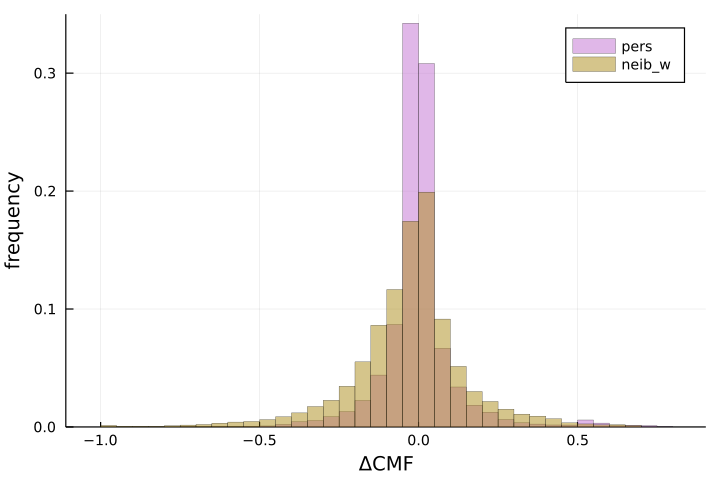

In [95]:
h2 = histogram(df21.dif_pers, normalize=:probability, bin=2N, label="pers",
    color=4, lw=0.2, fillalpha=0.5)
histogram!(df21.dif_neib, normalize=:probability, bin=2N, label="neib_w",
    color=5, lw=0.2, fillalpha=0.5, dpi=:120,
    ylim=(0,0.35), xlabel="ΔCMF", ylabel="frequency") #title="$(od).order +$(15*step)min", )

#### mn ± sd 

In [97]:
df21_ = filter(:dif_neib => d -> !isnan(d), df21)
gb = groupby(df21_, :real_cls);

mns_real = [mean(g.real) for g in gb]
mns_pers = [mean(g.pers) for g in gb]
mns_pred = [mean(g.pred) for g in gb]
# mns_pred_n = [mean(g.pred_n) for g in gb]
mns_neib = [mean(g.neib) for g in gb]

sds_real = [std(g.real) for g in gb]
sds_pers = [std(g.pers) for g in gb]
sds_pred = [std(g.pred) for g in gb]
# sds_pred_n = [std(g.pred_n) for g in gb]
sds_neib = [std(g.neib) for g in gb];

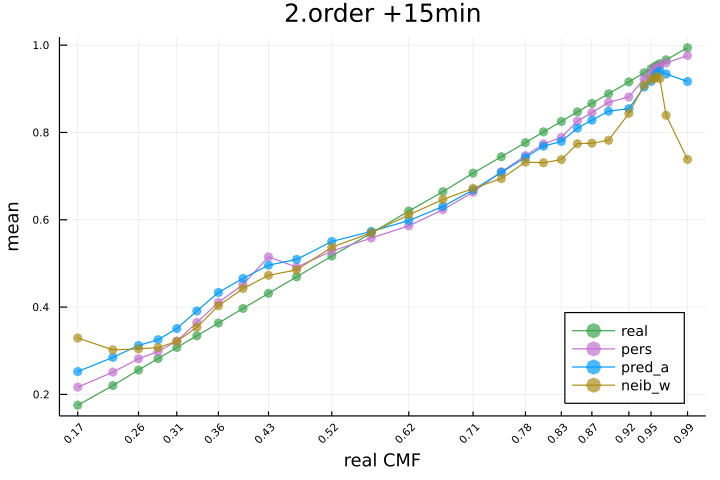

In [98]:
mns = plot(binMean, [mns_real, mns_pers, mns_pred, mns_neib], c=[3 4 1 5],
    marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "neib_w"], leg=:bottomright,
    xlabel="real CMF", ylabel="mean", title="2.order +$(15*1)min",
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10, dpi=:120) 

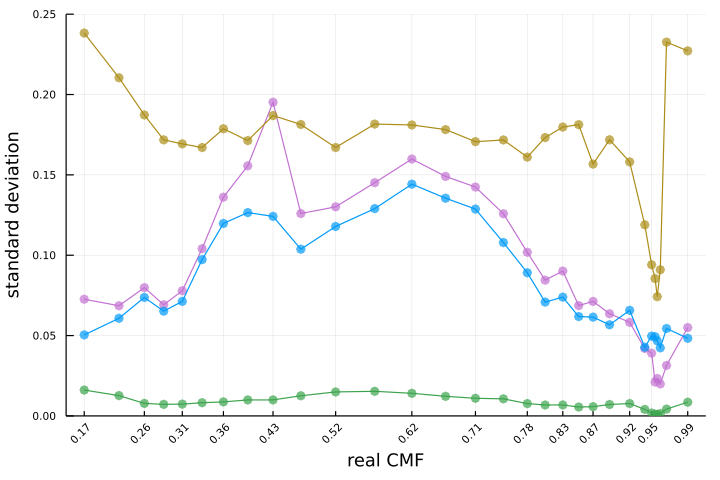

In [99]:
sds = plot(binMean, [sds_real, sds_pers, sds_pred, sds_neib], c=[3 4 1 5],
    marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "neib_w"], leg=:none,
    ylim=(0,0.25), xlabel="real CMF", ylabel="standard deviation",
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10, dpi=:120) 

##### +2 steps

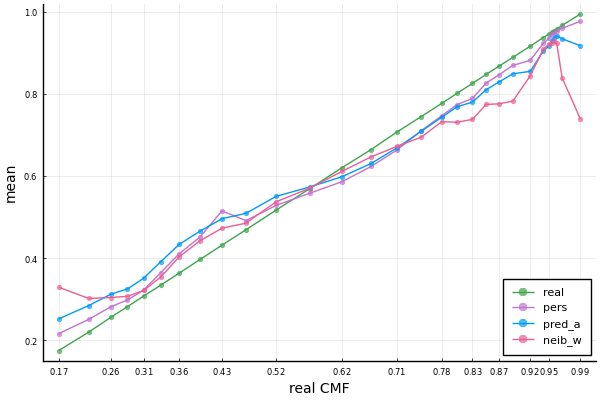

In [38]:
mns = plot(binMean, [mns_real, mns_pers, mns_pred, mns_neib], c=[3 4 1 7 5],
    marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "neib_w"], leg=:bottomright,
    xlabel="real CMF", ylabel="mean",
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10, fmt=:png) 

In [144]:
df22_ = filter(:dif_neib => d -> !isnan(d), df22)
gb = groupby(df22_, :real_cls);

mns_real = [mean(g.real) for g in gb]
mns_pers = [mean(g.pers) for g in gb]
mns_pred = [mean(g.pred) for g in gb]
mns_pred_n = [mean(g.pred_n) for g in gb]
mns_neib = [mean(g.neib) for g in gb]

sds_real = [std(g.real) for g in gb]
sds_pers = [std(g.pers) for g in gb]
sds_pred = [std(g.pred) for g in gb]
sds_pred_n = [std(g.pred_n) for g in gb]
sds_neib = [std(g.neib) for g in gb]

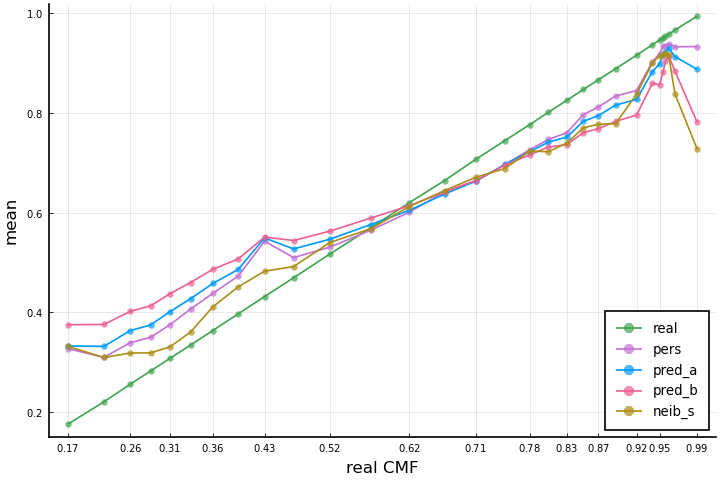

In [147]:
mns_s = plot(binMean, [mns_real, mns_pers, mns_pred, mns_pred_n, mns_neib], c=[3 4 1 7 5],
    marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b" "neib_s"], leg=:bottomright,
    xlabel="real CMF", ylabel="mean",
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10, dpi=:120) 

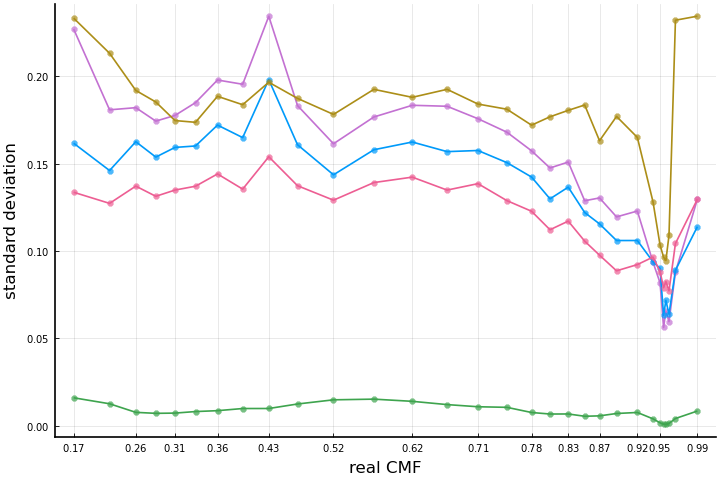

In [148]:
sds = plot(binMean, [sds_real, sds_pers, sds_pred, sds_pred_n, sds_neib], c=[3 4 1 7 5],
    marker=(0.7, :o, stroke(0)), 
    label=["real" "pers" "pred_a" "pred_b" "neib_w"], leg=:none,
    xlabel="real CMF", ylabel="standard deviation",
    xticks=xti, xrotation=45, tickfontsize=6, labelfontsize=10, dpi=:120) 

#### errors

In [100]:
function viz_err(df, binMean, xti; tit="2. order +$(15*2) min", err="mae")
    gb = groupby(df, :real_cls)
    if err == "mae"
        ylab = "mean absolute error"
        tit = tit
        ylim = 0.3
        err_pred = [meanad(g.pred, g.real) for g in gb]
        err_pers = [meanad(g.pers, g.real) for g in gb]
#         err_pred_n = [meanad(g.pred_n, g.real) for g in gb]
        err_neib = [meanad(g.neib, g.real) for g in gb]
    elseif err == "rmse"
        ylab = "root mean square error"
        tit = ""
        ylim = 0.4
        err_pred = [rmsd(g.pred, g.real) for g in gb]
        err_pers = [rmsd(g.pers, g.real) for g in gb]
#         err_pred_n = [rmsd(g.pred_n, g.real) for g in gb]
        err_neib = [rmsd(g.neib, g.real) for g in gb]
    end   
    (df == df21_ && err == "mae") ? leg1=:topleft : leg1 = :none
    if df == df21_ 
        errs = [err_pers, err_pred, err_neib]
        clrs = [4 1 5]
        labs = ["pers" "pred_a" "neib_s"]
    else
        errs = [err_pers, err_pred, err_pred_n, err_neib]
        clrs = [4 1 7 5]
        labs = ["pers" "pred_a" "pred_b" "neib_s"]
    end        
    p = plot(binMean, errs, c=clrs, marker=(0.7, stroke(0)), dpi=:120,
        leg=leg1, label=labs,
        xticks=xti, xrotation=45, ylim=(0,ylim), tickfontsize=5,
        xlabel="real CMF", ylabel=ylab, title=tit)
    return p
end

viz_err (generic function with 1 method)

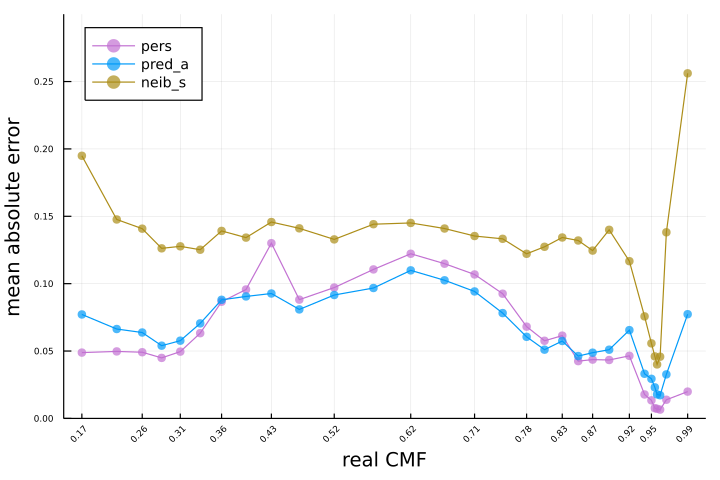

In [101]:
mae = viz_err(df21_, binMean, xti; tit="", err="mae")

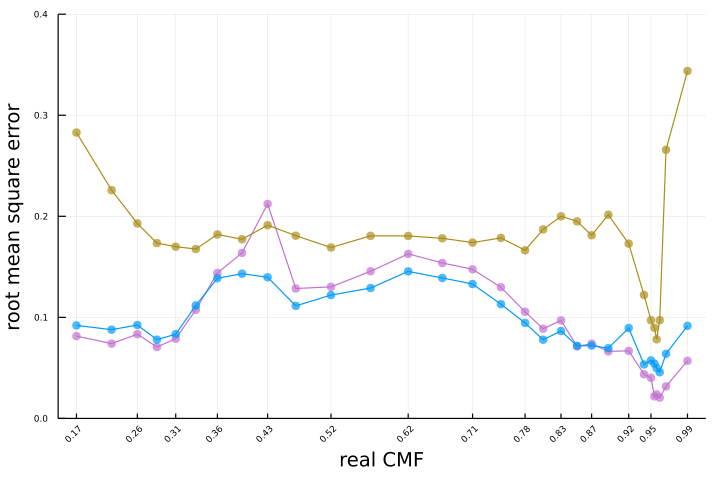

In [102]:
rmse = viz_err(df21_, binMean, xti; tit="2. order +$(15*1) min", err="rmse")

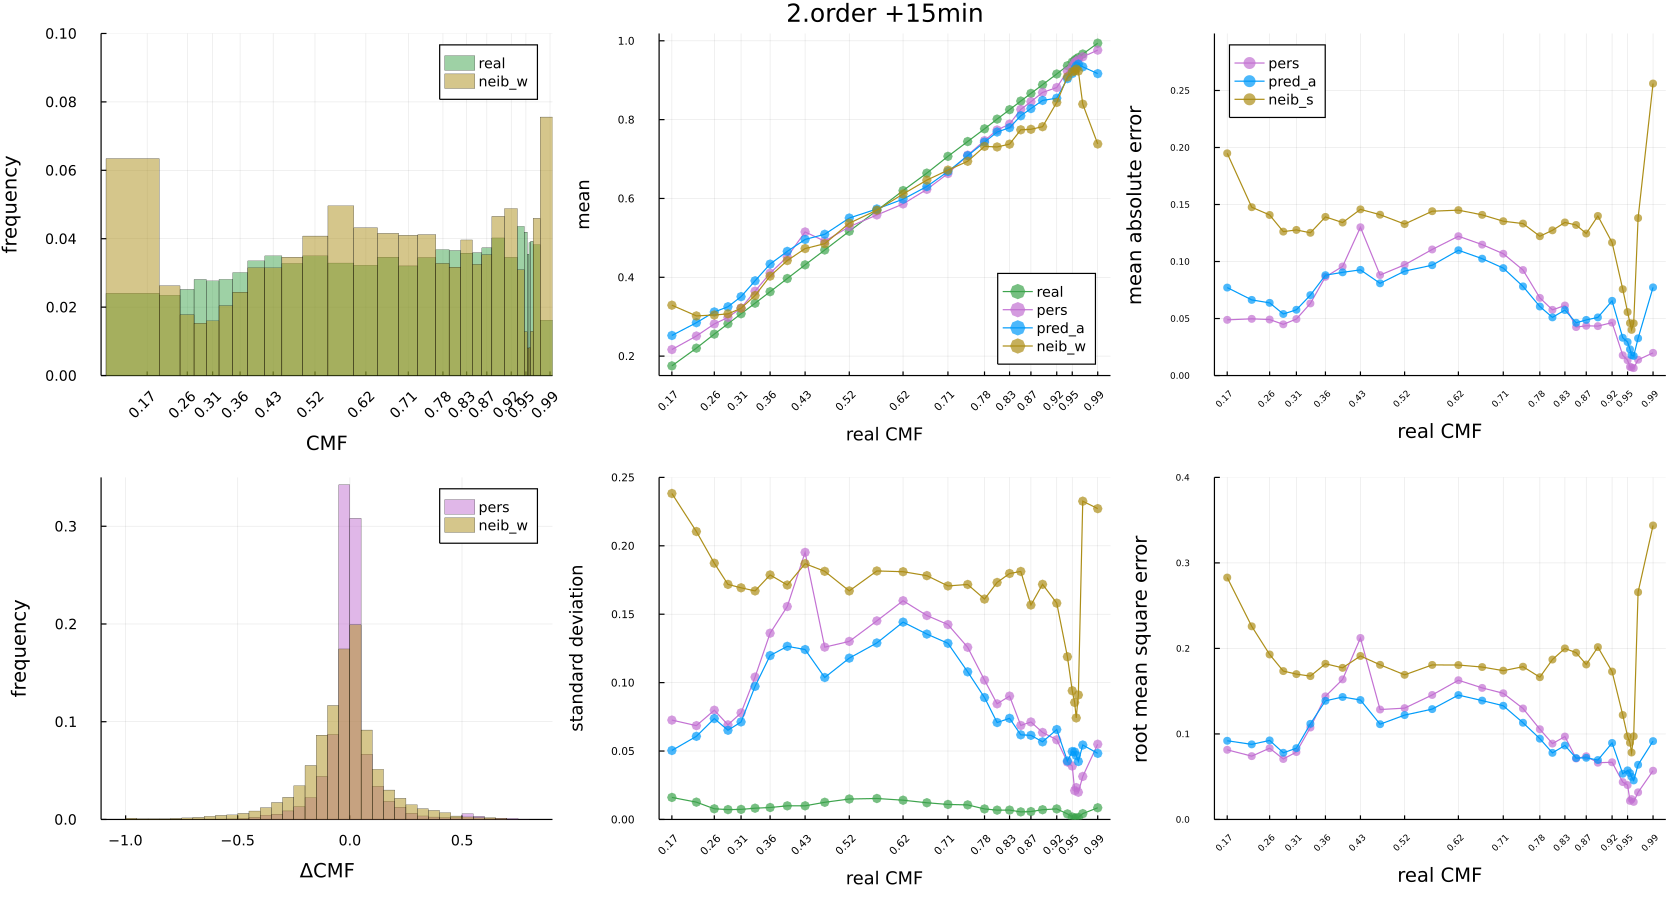

In [103]:
p = plot(h1, mns, mae, h2, sds, rmse, layout=@layout([a b c; d e f]), size=(1400, 750), fmt=:png,
        left_margin=20px, bottom_margin=20px)

##### +2 steps

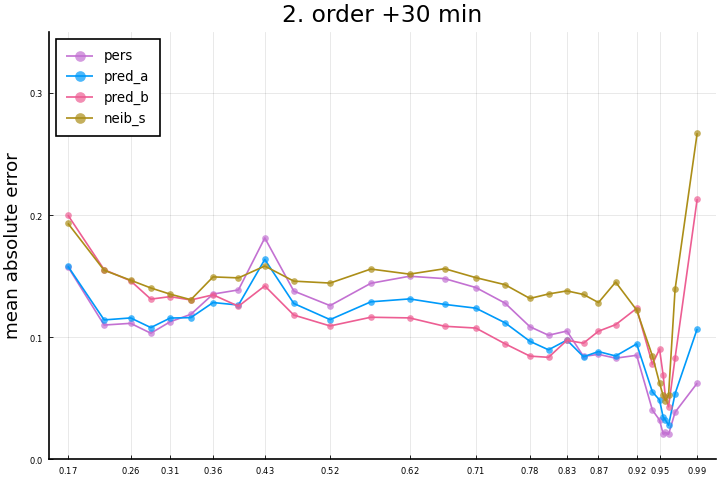

In [160]:
mae = viz_err(df22_, binMean, xti; tit="2. order +$(15*2) min", err="mae")

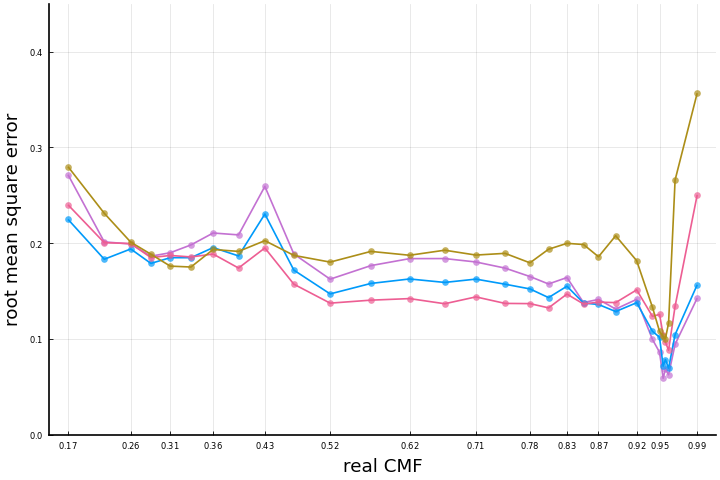

In [161]:
rmse = viz_err(df22_, binMean, xti; tit="2. order +$(15*2) min", err="rmse")